다양한 기계학습 방법을 통해 online 뉴스 인기도 예측력를 극대화
 
최종 평가는 아래 test 데이터를 활용, 최종 예측 평가 지표는 MAE (Mean Absolute Error).

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

In [170]:
# from google.colab import drive
# drive.mount('/content/drive')

In [171]:
path = "onlinenews.csv"
data = pd.read_csv(path, engine='python')
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop([' shares'], axis=1)
y = data[' shares']

- Data has 39644 rows and 60 columns.
- Column names:  [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global

데이터 6:2:2 Train valid test 구분

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2015010720)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=2015010720)

# X_valid = scaler.transform(X_valid)

최적 파라미터 조정 없이 학습 및 테스트 진행

In [91]:
clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
clf_dt.fit(X_train, y_train)
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_test_pred = clf_dt.predict(X_test)

In [92]:
# Show train & validation accuracies
print('- MSE (Train)      : {:.4}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Validation) : {:.4}'.format(mean_squared_error(y_valid, y_valid_pred)))
print('- MSE (test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- MAE (Train)      : {:.4}'.format(mean_absolute_error(y_train, y_train_pred)))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_valid, y_valid_pred))))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- MSE (Train)      : 0.0
- MSE (Validation) : 3.373e+08
- MSE (test) : 4.695e+08
- MAE (Train)      : 0.0
- MAE (Validation) : 4406
- MAE (Validation) : 4657


---

### EDA

In [93]:
# 기초 통계 및 결측치 확인
print("=== X 요약 통계 ===")
print(X.describe().T)
print("\n=== y 요약 통계 ===")
print(y.describe())
print("\n=== 결측치 개수 ===")
na_X = X.isna().sum()
na_y = pd.Series({'y': y.isna().sum()})
print(pd.concat([na_X, na_y], axis=1, keys=['X','y']))

=== X 요약 통계 ===
                                 count           mean            std      min  \
timedelta                      39644.0     354.530471     214.163767  8.00000   
n_tokens_title                 39644.0      10.398749       2.114037  2.00000   
n_tokens_content               39644.0     546.514731     471.107508  0.00000   
n_unique_tokens                39644.0       0.548216       3.520708  0.00000   
n_non_stop_words               39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens       39644.0       0.689175       3.264816  0.00000   
num_hrefs                      39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                 39644.0       3.293638       3.855141  0.00000   
num_imgs                       39644.0       4.544143       8.309434  0.00000   
num_videos                     39644.0       1.249874       4.107855  0.00000   
average_token_length           39644.0       4.548239       0.844406  0.00000   
num_keywords

Skewness of y: 33.9639


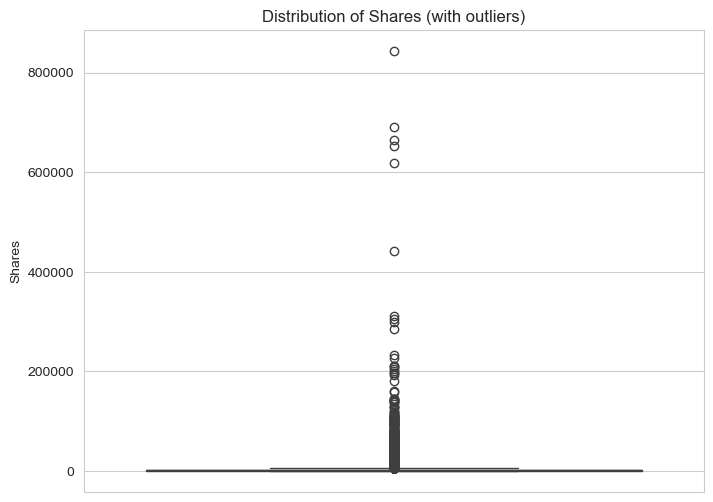

In [94]:
# y 왜도 계산 및 이상치 파악 (전체)
skewness = y.skew()
print(f'Skewness of y: {skewness:.4f}')
      
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Distribution of Shares (with outliers)')
plt.ylabel('Shares')
plt.show()


=== X feature skewness ===
n_non_stop_words                 198.792445
n_unique_tokens                  198.655116
n_non_stop_unique_tokens         198.443294
kw_max_min                        35.328434
kw_avg_min                        31.306108
self_reference_min_shares         26.264364
self_reference_avg_sharess        17.914093
kw_max_avg                        16.411670
self_reference_max_shares         13.870849
kw_min_max                        10.386372
num_videos                         7.019533
kw_avg_avg                         5.760177
num_self_hrefs                     5.172751
num_hrefs                          4.013495
data_channel_is_lifestyle          3.993019
num_imgs                           3.946596
data_channel_is_socmed             3.758880
weekday_is_saturday                3.637086
weekday_is_sunday                  3.399927
min_positive_polarity              3.040468
n_tokens_content                   2.945422
kw_min_min                         2.374947
is_w

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3812532366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')


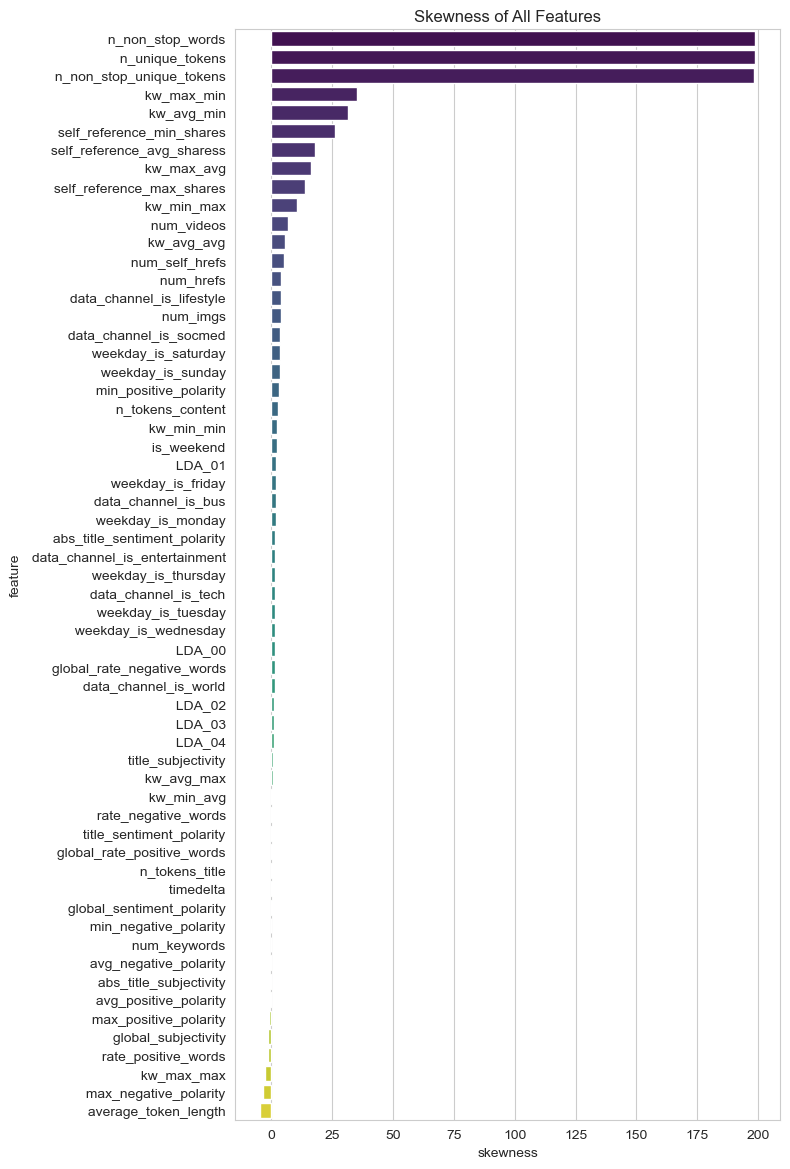

In [95]:
# X 모든 특성의 왜도 계산 및 시각화 (전체)
skewness = X.skew().sort_values(ascending=False)
print("\n=== X feature skewness ===")
print(skewness)
plt.figure(figsize=(8, len(skewness)*0.2))
sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')
plt.title('Skewness of All Features')
plt.xlabel('skewness')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

### 모델 + 이상치제거, x,y 로그변환, PowerTransformer 조합 분석

In [ ]:
from sklearn.base import clone
from tqdm import tqdm
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# 1) 실행할 모델 정의
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=50, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=False)
}

# 2) 전처리 조합 리스트 (use_log: x+y 로그 변환, use_pt: PowerTransformer)
combos = [
    {'name': 'raw',                  'remove_pct': None,    'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'logXY',                'remove_pct': None,    'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'PT only',              'remove_pct': None,    'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'logXY + PT',           'remove_pct': None,    'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'remove 1%',            'remove_pct': 0.99,    'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'remove 1% + logXY',    'remove_pct': 0.99,    'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'remove 1% + PT',       'remove_pct': 0.99,    'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'remove 1% + logXY+PT', 'remove_pct': 0.99,    'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'remove 0.5%',          'remove_pct': 0.995,   'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'remove 0.5%+logXY',    'remove_pct': 0.995,   'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'remove 0.5%+PT',       'remove_pct': 0.995,   'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'remove0.5%+logXY+PT',  'remove_pct': 0.995,   'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'IQR',                  'remove_pct': None,    'use_iqr': True,  'use_log': False, 'use_pt': False},
    {'name': 'IQR + logXY',          'remove_pct': None,    'use_iqr': True,  'use_log': True,  'use_pt': False},
    {'name': 'IQR + PT',             'remove_pct': None,    'use_iqr': True,  'use_log': False, 'use_pt': True},
    {'name': 'IQR+logXY+PT',         'remove_pct': None,    'use_iqr': True,  'use_log': True,  'use_pt': True}
]

# 3) 전처리·평가 함수 (이상치제거 → x/y 로그 → PT → 학습 → y 복원 → 평가)
def preprocess_and_eval(model, X_tr, y_tr, X_te, y_te,
                        remove_pct=None, use_iqr=False,
                        use_log=False, use_pt=False):
    Xc, yc = X_tr.copy(), y_tr.copy()

    # 1) 이상치 제거 (y 기준)
    if use_iqr:
        Q1, Q3 = np.percentile(yc, [25, 75])
        mask = (yc >= Q1 - 1.5*(Q3-Q1)) & (yc <= Q3 + 1.5*(Q3-Q1))
        Xc, yc = Xc[mask], yc[mask]
    elif remove_pct is not None:
        thresh = np.percentile(yc, remove_pct*100)
        mask = yc <= thresh
        Xc, yc = Xc[mask], yc[mask]

    # 2) 로그 변환 (x는 skew>1 & non-negative 컬럼만, y 전체)
    if use_log:
        # y 로그
        yc = np.log1p(yc)
        # x selective 로그
        skew_cols = Xc.columns[(Xc.skew().abs() > 1) & (Xc.min() >= 0)]
        Xc[skew_cols] = np.log1p(Xc[skew_cols])
        Xc = np.nan_to_num(Xc, neginf=0, posinf=0)

    # 3) PowerTransformer (x)
    if use_pt:
        pt = PowerTransformer(method='yeo-johnson')
        Xc = pt.fit_transform(Xc)
        Xc = np.nan_to_num(Xc, neginf=0, posinf=0)
        # test에도 동일 변환
        Xte = X_te.copy()
        if use_log:
            Xte[skew_cols] = np.log1p(Xte[skew_cols])
        Xte = pt.transform(np.nan_to_num(Xte, neginf=0, posinf=0))
    else:
        Xte = X_te.copy()
        if use_log:
            Xte[skew_cols] = np.log1p(Xte[skew_cols])
            Xte = np.nan_to_num(Xte, neginf=0, posinf=0)

    # 4) 학습·예측
    clf = clone(model)
    clf.fit(Xc, yc)
    y_pred_log = clf.predict(Xte)

    # 5) y 복원
    if use_log:
        y_pred = np.expm1(y_pred_log)
    else:
        y_pred = y_pred_log

    # 6) 평가
    return mean_squared_error(y_te, y_pred), mean_absolute_error(y_te, y_pred)

# 4) 일괄 실행 및 결과 수집
results = []
for model_name, model in models.items():
    print(f'\n=== {model_name} ===')
    for combo in tqdm(combos, desc=model_name):
        mse, mae = preprocess_and_eval(
            model, X_train, y_train, X_test, y_test,
            remove_pct=combo['remove_pct'],
            use_iqr=combo['use_iqr'],
            use_log=combo['use_log'],
            use_pt=combo['use_pt']
        )
        print(f"{combo['name']:20s} → MSE: {mse:.4e}, MAE: {mae:.4f}")
        results.append({
            'model': model_name,
            'combo': combo['name'],
            'MSE': mse,
            'MAE': mae
        })

# 5) DataFrame 변환, MAE 기준 정렬
df = pd.DataFrame(results).sort_values(by='MAE', ascending=True)


=== LinearRegression ===


LinearRegression:  12%|█▎        | 2/16 [00:00<00:01, 12.57it/s]

raw                  → MSE: 1.4615e+08, MAE: 3054.4219
logXY                → MSE: 1.4878e+08, MAE: 2369.0533


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


PT only              → MSE: 1.4546e+08, MAE: 3092.2512


LinearRegression:  25%|██▌       | 4/16 [00:01<00:03,  3.51it/s]

logXY + PT           → MSE: 1.4856e+08, MAE: 2363.3081
remove 1%            → MSE: 1.4647e+08, MAE: 2644.2282
remove 1% + logXY    → MSE: 1.4920e+08, MAE: 2356.9300


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  44%|████▍     | 7/16 [00:01<00:01,  4.60it/s]

remove 1% + PT       → MSE: 1.4607e+08, MAE: 2639.3857


LinearRegression:  50%|█████     | 8/16 [00:01<00:02,  3.88it/s]

remove 1% + logXY+PT → MSE: 1.4900e+08, MAE: 2351.9106
remove 0.5%          → MSE: 1.4604e+08, MAE: 2738.4920
remove 0.5%+logXY    → MSE: 1.4901e+08, MAE: 2362.5999


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  69%|██████▉   | 11/16 [00:02<00:01,  4.60it/s]

remove 0.5%+PT       → MSE: 1.4562e+08, MAE: 2732.8567


LinearRegression:  88%|████████▊ | 14/16 [00:03<00:00,  5.14it/s]

remove0.5%+logXY+PT  → MSE: 1.4881e+08, MAE: 2357.1015
IQR                  → MSE: 1.5009e+08, MAE: 2361.7519
IQR + logXY          → MSE: 1.5107e+08, MAE: 2348.2890


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  94%|█████████▍| 15/16 [00:03<00:00,  4.26it/s]

IQR + PT             → MSE: 1.4998e+08, MAE: 2358.6995


LinearRegression: 100%|██████████| 16/16 [00:03<00:00,  4.20it/s]


IQR+logXY+PT         → MSE: 1.5098e+08, MAE: 2345.8514

=== Ridge ===


Ridge:   0%|          | 0/16 [00:00<?, ?it/s]

raw                  → MSE: 1.4613e+08, MAE: 3052.4784
logXY                → MSE: 1.4878e+08, MAE: 2368.8089


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  19%|█▉        | 3/16 [00:00<00:02,  5.63it/s]

PT only              → MSE: 1.4546e+08, MAE: 3092.2546


Ridge:  25%|██▌       | 4/16 [00:00<00:03,  3.89it/s]

logXY + PT           → MSE: 1.4856e+08, MAE: 2363.2830
remove 1%            → MSE: 1.4647e+08, MAE: 2644.1570
remove 1% + logXY    → MSE: 1.4920e+08, MAE: 2356.8532


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  44%|████▍     | 7/16 [00:01<00:01,  4.97it/s]

remove 1% + PT       → MSE: 1.4607e+08, MAE: 2639.3902


Ridge:  50%|█████     | 8/16 [00:01<00:01,  4.07it/s]

remove 1% + logXY+PT → MSE: 1.4900e+08, MAE: 2351.8953
remove 0.5%          → MSE: 1.4603e+08, MAE: 2737.5928
remove 0.5%+logXY    → MSE: 1.4901e+08, MAE: 2362.3855


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  69%|██████▉   | 11/16 [00:02<00:01,  4.82it/s]

remove 0.5%+PT       → MSE: 1.4562e+08, MAE: 2732.8579


Ridge:  75%|███████▌  | 12/16 [00:02<00:00,  4.03it/s]

remove0.5%+logXY+PT  → MSE: 1.4881e+08, MAE: 2357.0818
IQR                  → MSE: 1.5009e+08, MAE: 2361.7377
IQR + logXY          → MSE: 1.5107e+08, MAE: 2348.3204


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  94%|█████████▍| 15/16 [00:03<00:00,  4.85it/s]

IQR + PT             → MSE: 1.4998e+08, MAE: 2358.7038


Ridge: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]


IQR+logXY+PT         → MSE: 1.5098e+08, MAE: 2345.8726

=== Lasso ===


Lasso:   0%|          | 0/16 [00:00<?, ?it/s]/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+12, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(
Lasso:   6%|▋         | 1/16 [00:04<01:06,  4.41s/it]

raw                  → MSE: 1.4604e+08, MAE: 3044.4905
logXY                → MSE: 1.5016e+08, MAE: 2451.7893


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  19%|█▉        | 3/16 [00:07<00:28,  2.18s/it]

PT only              → MSE: 1.4545e+08, MAE: 3091.3608


Lasso:  25%|██▌       | 4/16 [00:07<00:18,  1.57s/it]

logXY + PT           → MSE: 1.5039e+08, MAE: 2463.6460


Lasso:  31%|███▏      | 5/16 [00:08<00:13,  1.27s/it]

remove 1%            → MSE: 1.4647e+08, MAE: 2644.1412
remove 1% + logXY    → MSE: 1.5041e+08, MAE: 2440.0053


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  44%|████▍     | 7/16 [00:10<00:10,  1.15s/it]

remove 1% + PT       → MSE: 1.4608e+08, MAE: 2639.8814


Lasso:  50%|█████     | 8/16 [00:10<00:07,  1.05it/s]

remove 1% + logXY+PT → MSE: 1.5059e+08, MAE: 2451.9822


Lasso:  56%|█████▋    | 9/16 [00:11<00:05,  1.17it/s]

remove 0.5%          → MSE: 1.4601e+08, MAE: 2735.7608
remove 0.5%+logXY    → MSE: 1.5030e+08, MAE: 2445.3367


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  69%|██████▉   | 11/16 [00:13<00:04,  1.10it/s]

remove 0.5%+PT       → MSE: 1.4561e+08, MAE: 2732.9592


Lasso:  75%|███████▌  | 12/16 [00:13<00:03,  1.27it/s]

remove0.5%+logXY+PT  → MSE: 1.5050e+08, MAE: 2457.2591


Lasso:  81%|████████▏ | 13/16 [00:14<00:02,  1.48it/s]

IQR                  → MSE: 1.5011e+08, MAE: 2363.7266
IQR + logXY          → MSE: 1.5170e+08, MAE: 2420.4735


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  94%|█████████▍| 15/16 [00:15<00:00,  1.59it/s]

IQR + PT             → MSE: 1.4999e+08, MAE: 2359.6866


Lasso: 100%|██████████| 16/16 [00:15<00:00,  1.03it/s]


IQR+logXY+PT         → MSE: 1.5177e+08, MAE: 2428.6351

=== KNeighbors ===


KNeighbors:  12%|█▎        | 2/16 [00:00<00:03,  4.64it/s]

raw                  → MSE: 1.5835e+08, MAE: 3230.4389
logXY                → MSE: 1.5029e+08, MAE: 2583.3318


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  19%|█▉        | 3/16 [00:00<00:04,  2.97it/s]

PT only              → MSE: 1.5628e+08, MAE: 3145.0006


KNeighbors:  31%|███▏      | 5/16 [00:01<00:03,  3.48it/s]

logXY + PT           → MSE: 1.4831e+08, MAE: 2474.3883
remove 1%            → MSE: 1.4965e+08, MAE: 2838.1015


KNeighbors:  38%|███▊      | 6/16 [00:01<00:02,  4.24it/s]

remove 1% + logXY    → MSE: 1.5024e+08, MAE: 2533.9162


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  44%|████▍     | 7/16 [00:02<00:02,  3.29it/s]

remove 1% + PT       → MSE: 1.4713e+08, MAE: 2731.2119


KNeighbors:  56%|█████▋    | 9/16 [00:02<00:01,  3.60it/s]

remove 1% + logXY+PT → MSE: 1.4865e+08, MAE: 2439.7070
remove 0.5%          → MSE: 1.5064e+08, MAE: 2963.5664


KNeighbors:  62%|██████▎   | 10/16 [00:02<00:01,  4.25it/s]

remove 0.5%+logXY    → MSE: 1.5026e+08, MAE: 2556.8619


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  69%|██████▉   | 11/16 [00:03<00:01,  3.33it/s]

remove 0.5%+PT       → MSE: 1.4777e+08, MAE: 2823.5035


KNeighbors:  81%|████████▏ | 13/16 [00:03<00:00,  3.59it/s]

remove0.5%+logXY+PT  → MSE: 1.4855e+08, MAE: 2452.6151
IQR                  → MSE: 1.5050e+08, MAE: 2450.1682


KNeighbors:  88%|████████▊ | 14/16 [00:03<00:00,  4.29it/s]

IQR + logXY          → MSE: 1.5149e+08, MAE: 2452.7527


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  94%|█████████▍| 15/16 [00:04<00:00,  3.55it/s]

IQR + PT             → MSE: 1.5012e+08, MAE: 2393.1101


KNeighbors: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]


IQR+logXY+PT         → MSE: 1.5091e+08, MAE: 2382.4125

=== DecisionTree ===


DecisionTree:   6%|▋         | 1/16 [00:01<00:16,  1.08s/it]

raw                  → MSE: 4.9251e+08, MAE: 4694.8740


DecisionTree:  12%|█▎        | 2/16 [00:01<00:12,  1.13it/s]

logXY                → MSE: 4.6353e+08, MAE: 4294.3101


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  19%|█▉        | 3/16 [00:03<00:14,  1.11s/it]

PT only              → MSE: 4.9334e+08, MAE: 4531.0320


DecisionTree:  25%|██▌       | 4/16 [00:04<00:13,  1.10s/it]

logXY + PT           → MSE: 5.2029e+08, MAE: 4448.1903


DecisionTree:  31%|███▏      | 5/16 [00:05<00:11,  1.03s/it]

remove 1%            → MSE: 1.6008e+08, MAE: 3379.8002


DecisionTree:  38%|███▊      | 6/16 [00:05<00:09,  1.06it/s]

remove 1% + logXY    → MSE: 1.5939e+08, MAE: 3311.5801


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  44%|████▍     | 7/16 [00:07<00:09,  1.04s/it]

remove 1% + PT       → MSE: 1.5943e+08, MAE: 3342.0733


DecisionTree:  50%|█████     | 8/16 [00:08<00:08,  1.05s/it]

remove 1% + logXY+PT → MSE: 1.5811e+08, MAE: 3259.0581


DecisionTree:  56%|█████▋    | 9/16 [00:09<00:07,  1.02s/it]

remove 0.5%          → MSE: 1.6728e+08, MAE: 3624.7430


DecisionTree:  62%|██████▎   | 10/16 [00:09<00:05,  1.07it/s]

remove 0.5%+logXY    → MSE: 1.6795e+08, MAE: 3502.8639


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  69%|██████▉   | 11/16 [00:11<00:05,  1.04s/it]

remove 0.5%+PT       → MSE: 1.6724e+08, MAE: 3660.2761


DecisionTree:  75%|███████▌  | 12/16 [00:12<00:04,  1.05s/it]

remove0.5%+logXY+PT  → MSE: 1.7136e+08, MAE: 3564.3611


DecisionTree:  81%|████████▏ | 13/16 [00:13<00:02,  1.07it/s]

IQR                  → MSE: 1.5095e+08, MAE: 2587.9155


DecisionTree:  88%|████████▊ | 14/16 [00:13<00:01,  1.18it/s]

IQR + logXY          → MSE: 1.5067e+08, MAE: 2580.1488


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  94%|█████████▍| 15/16 [00:14<00:00,  1.11it/s]

IQR + PT             → MSE: 1.5072e+08, MAE: 2589.8068


DecisionTree: 100%|██████████| 16/16 [00:15<00:00,  1.03it/s]


IQR+logXY+PT         → MSE: 1.5094e+08, MAE: 2590.0343

=== ExtraTrees ===


ExtraTrees:   6%|▋         | 1/16 [00:07<01:51,  7.43s/it]

raw                  → MSE: 1.5478e+08, MAE: 3359.4221


ExtraTrees:  12%|█▎        | 2/16 [00:14<01:39,  7.09s/it]

logXY                → MSE: 1.4738e+08, MAE: 2359.5051


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  19%|█▉        | 3/16 [00:22<01:36,  7.44s/it]

PT only              → MSE: 1.5485e+08, MAE: 3430.2516


ExtraTrees:  25%|██▌       | 4/16 [00:29<01:28,  7.41s/it]

logXY + PT           → MSE: 1.4779e+08, MAE: 2365.6663


ExtraTrees:  31%|███▏      | 5/16 [00:36<01:19,  7.22s/it]

remove 1%            → MSE: 1.4563e+08, MAE: 2754.8766


ExtraTrees:  38%|███▊      | 6/16 [00:43<01:10,  7.03s/it]

remove 1% + logXY    → MSE: 1.4818e+08, MAE: 2339.9808


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  44%|████▍     | 7/16 [00:50<01:04,  7.16s/it]

remove 1% + PT       → MSE: 1.4508e+08, MAE: 2748.6603


ExtraTrees:  50%|█████     | 8/16 [00:57<00:57,  7.18s/it]

remove 1% + logXY+PT → MSE: 1.4834e+08, MAE: 2346.0318


ExtraTrees:  56%|█████▋    | 9/16 [01:04<00:49,  7.12s/it]

remove 0.5%          → MSE: 1.4532e+08, MAE: 2880.4177


ExtraTrees:  62%|██████▎   | 10/16 [01:11<00:42,  7.01s/it]

remove 0.5%+logXY    → MSE: 1.4797e+08, MAE: 2346.0074


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  69%|██████▉   | 11/16 [01:18<00:35,  7.17s/it]

remove 0.5%+PT       → MSE: 1.4511e+08, MAE: 2903.5330


ExtraTrees:  75%|███████▌  | 12/16 [01:26<00:28,  7.21s/it]

remove0.5%+logXY+PT  → MSE: 1.4788e+08, MAE: 2351.6940


ExtraTrees:  81%|████████▏ | 13/16 [01:32<00:20,  6.76s/it]

IQR                  → MSE: 1.4958e+08, MAE: 2354.3449


ExtraTrees:  88%|████████▊ | 14/16 [01:37<00:12,  6.48s/it]

IQR + logXY          → MSE: 1.5086e+08, MAE: 2333.7243


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  94%|█████████▍| 15/16 [01:44<00:06,  6.45s/it]

IQR + PT             → MSE: 1.4954e+08, MAE: 2354.4284


ExtraTrees: 100%|██████████| 16/16 [01:50<00:00,  6.91s/it]


IQR+logXY+PT         → MSE: 1.5074e+08, MAE: 2333.9392

=== RandomForest ===


RandomForest:   6%|▋         | 1/16 [00:32<08:03, 32.22s/it]

raw                  → MSE: 1.5678e+08, MAE: 3403.8136


RandomForest:  12%|█▎        | 2/16 [00:54<06:08, 26.34s/it]

logXY                → MSE: 1.4790e+08, MAE: 2369.9257


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  19%|█▉        | 3/16 [01:27<06:20, 29.24s/it]

PT only              → MSE: 1.5749e+08, MAE: 3430.1657


RandomForest:  25%|██▌       | 4/16 [01:49<05:19, 26.64s/it]

logXY + PT           → MSE: 1.4798e+08, MAE: 2369.7801


RandomForest:  31%|███▏      | 5/16 [02:17<04:57, 27.05s/it]

remove 1%            → MSE: 1.4612e+08, MAE: 2773.4278


RandomForest:  38%|███▊      | 6/16 [02:39<04:12, 25.26s/it]

remove 1% + logXY    → MSE: 1.4851e+08, MAE: 2349.8722


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  44%|████▍     | 7/16 [03:07<03:56, 26.23s/it]

remove 1% + PT       → MSE: 1.4593e+08, MAE: 2771.5119


RandomForest:  50%|█████     | 8/16 [03:30<03:20, 25.09s/it]

remove 1% + logXY+PT → MSE: 1.4850e+08, MAE: 2347.7229


RandomForest:  56%|█████▋    | 9/16 [03:59<03:04, 26.32s/it]

remove 0.5%          → MSE: 1.4633e+08, MAE: 2929.3327


RandomForest:  62%|██████▎   | 10/16 [04:21<02:29, 24.97s/it]

remove 0.5%+logXY    → MSE: 1.4819e+08, MAE: 2359.1299


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  69%|██████▉   | 11/16 [04:50<02:11, 26.33s/it]

remove 0.5%+PT       → MSE: 1.4624e+08, MAE: 2929.3867


RandomForest:  75%|███████▌  | 12/16 [05:12<01:40, 25.12s/it]

remove0.5%+logXY+PT  → MSE: 1.4829e+08, MAE: 2359.4170


RandomForest:  81%|████████▏ | 13/16 [05:33<01:11, 23.81s/it]

IQR                  → MSE: 1.4960e+08, MAE: 2353.1683


RandomForest:  88%|████████▊ | 14/16 [05:52<00:44, 22.28s/it]

IQR + logXY          → MSE: 1.5079e+08, MAE: 2333.1758


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  94%|█████████▍| 15/16 [06:13<00:21, 21.97s/it]

IQR + PT             → MSE: 1.4961e+08, MAE: 2354.0967


RandomForest: 100%|██████████| 16/16 [06:32<00:00, 24.56s/it]


IQR+logXY+PT         → MSE: 1.5079e+08, MAE: 2332.6704

=== AdaBoost ===


AdaBoost:   6%|▋         | 1/16 [00:02<00:42,  2.81s/it]

raw                  → MSE: 6.9676e+08, MAE: 23075.5807


AdaBoost:  12%|█▎        | 2/16 [00:06<00:43,  3.11s/it]

logXY                → MSE: 1.4656e+08, MAE: 2963.7575


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  19%|█▉        | 3/16 [00:09<00:41,  3.16s/it]

PT only              → MSE: 6.6132e+08, MAE: 22512.6563


AdaBoost:  25%|██▌       | 4/16 [00:13<00:40,  3.39s/it]

logXY + PT           → MSE: 1.4652e+08, MAE: 2952.4046


AdaBoost:  31%|███▏      | 5/16 [00:14<00:28,  2.55s/it]

remove 1%            → MSE: 1.4682e+08, MAE: 3588.2766


AdaBoost:  38%|███▊      | 6/16 [00:17<00:27,  2.79s/it]

remove 1% + logXY    → MSE: 1.4763e+08, MAE: 2528.7727


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  44%|████▍     | 7/16 [00:19<00:23,  2.58s/it]

remove 1% + PT       → MSE: 1.4983e+08, MAE: 4350.0559


AdaBoost:  50%|█████     | 8/16 [00:23<00:23,  2.91s/it]

remove 1% + logXY+PT → MSE: 1.4814e+08, MAE: 2481.4635


AdaBoost:  56%|█████▋    | 9/16 [00:24<00:17,  2.44s/it]

remove 0.5%          → MSE: 1.6098e+08, MAE: 5509.8385


AdaBoost:  62%|██████▎   | 10/16 [00:27<00:16,  2.70s/it]

remove 0.5%+logXY    → MSE: 1.4704e+08, MAE: 2577.6743


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  69%|██████▉   | 11/16 [00:29<00:11,  2.32s/it]

remove 0.5%+PT       → MSE: 1.5223e+08, MAE: 4120.0531


AdaBoost:  75%|███████▌  | 12/16 [00:32<00:10,  2.73s/it]

remove0.5%+logXY+PT  → MSE: 1.4708e+08, MAE: 2601.6728


AdaBoost:  81%|████████▏ | 13/16 [00:34<00:06,  2.21s/it]

IQR                  → MSE: 1.4904e+08, MAE: 2471.7109


AdaBoost:  88%|████████▊ | 14/16 [00:37<00:04,  2.45s/it]

IQR + logXY          → MSE: 1.5225e+08, MAE: 2426.6162


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  94%|█████████▍| 15/16 [00:38<00:02,  2.29s/it]

IQR + PT             → MSE: 1.4893e+08, MAE: 2499.0280


AdaBoost: 100%|██████████| 16/16 [00:42<00:00,  2.64s/it]


IQR+logXY+PT         → MSE: 1.5245e+08, MAE: 2437.5628

=== GradientBoosting ===


GradientBoosting:   6%|▋         | 1/16 [00:12<03:11, 12.77s/it]

raw                  → MSE: 1.4895e+08, MAE: 3025.2627


GradientBoosting:  12%|█▎        | 2/16 [00:25<02:58, 12.76s/it]

logXY                → MSE: 1.4827e+08, MAE: 2333.4397


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  19%|█▉        | 3/16 [00:38<02:48, 12.93s/it]

PT only              → MSE: 1.4761e+08, MAE: 3016.2191


GradientBoosting:  25%|██▌       | 4/16 [00:51<02:35, 12.99s/it]

logXY + PT           → MSE: 1.4827e+08, MAE: 2334.3818


GradientBoosting:  31%|███▏      | 5/16 [01:04<02:21, 12.86s/it]

remove 1%            → MSE: 1.4571e+08, MAE: 2612.8664


GradientBoosting:  38%|███▊      | 6/16 [01:17<02:08, 12.86s/it]

remove 1% + logXY    → MSE: 1.4877e+08, MAE: 2324.3207


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  44%|████▍     | 7/16 [01:30<01:57, 13.10s/it]

remove 1% + PT       → MSE: 1.4582e+08, MAE: 2615.4335


GradientBoosting:  50%|█████     | 8/16 [01:44<01:46, 13.35s/it]

remove 1% + logXY+PT → MSE: 1.4877e+08, MAE: 2324.4465


GradientBoosting:  56%|█████▋    | 9/16 [01:58<01:33, 13.39s/it]

remove 0.5%          → MSE: 1.4545e+08, MAE: 2717.2984


GradientBoosting:  62%|██████▎   | 10/16 [02:11<01:19, 13.28s/it]

remove 0.5%+logXY    → MSE: 1.4859e+08, MAE: 2327.2043


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  69%|██████▉   | 11/16 [02:24<01:06, 13.28s/it]

remove 0.5%+PT       → MSE: 1.4547e+08, MAE: 2717.2434


GradientBoosting:  75%|███████▌  | 12/16 [02:37<00:53, 13.26s/it]

remove0.5%+logXY+PT  → MSE: 1.4857e+08, MAE: 2327.5559


GradientBoosting:  81%|████████▏ | 13/16 [02:49<00:38, 12.69s/it]

IQR                  → MSE: 1.4986e+08, MAE: 2336.4388


GradientBoosting:  88%|████████▊ | 14/16 [03:00<00:24, 12.30s/it]

IQR + logXY          → MSE: 1.5091e+08, MAE: 2325.4720


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  94%|█████████▍| 15/16 [03:12<00:12, 12.12s/it]

IQR + PT             → MSE: 1.4988e+08, MAE: 2336.7665


GradientBoosting: 100%|██████████| 16/16 [03:23<00:00, 12.74s/it]


IQR+logXY+PT         → MSE: 1.5091e+08, MAE: 2325.8476

=== HistGradientBoosting ===


HistGradientBoosting:   6%|▋         | 1/16 [00:00<00:02,  6.90it/s]

raw                  → MSE: 1.4776e+08, MAE: 3079.2895


HistGradientBoosting:  12%|█▎        | 2/16 [00:00<00:03,  3.67it/s]

logXY                → MSE: 1.4820e+08, MAE: 2338.1709


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  19%|█▉        | 3/16 [00:00<00:04,  2.70it/s]

PT only              → MSE: 1.4776e+08, MAE: 3079.2895


HistGradientBoosting:  25%|██▌       | 4/16 [00:01<00:05,  2.08it/s]

logXY + PT           → MSE: 1.4820e+08, MAE: 2338.1709


HistGradientBoosting:  31%|███▏      | 5/16 [00:01<00:04,  2.45it/s]

remove 1%            → MSE: 1.4588e+08, MAE: 2608.0822


HistGradientBoosting:  38%|███▊      | 6/16 [00:02<00:04,  2.39it/s]

remove 1% + logXY    → MSE: 1.4859e+08, MAE: 2320.0017


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  44%|████▍     | 7/16 [00:02<00:04,  2.11it/s]

remove 1% + PT       → MSE: 1.4588e+08, MAE: 2608.0764


HistGradientBoosting:  50%|█████     | 8/16 [00:03<00:04,  1.85it/s]

remove 1% + logXY+PT → MSE: 1.4859e+08, MAE: 2320.0017


HistGradientBoosting:  56%|█████▋    | 9/16 [00:03<00:03,  2.08it/s]

remove 0.5%          → MSE: 1.4526e+08, MAE: 2704.4029


HistGradientBoosting:  62%|██████▎   | 10/16 [00:04<00:02,  2.13it/s]

remove 0.5%+logXY    → MSE: 1.4831e+08, MAE: 2326.3207


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  69%|██████▉   | 11/16 [00:05<00:02,  1.87it/s]

remove 0.5%+PT       → MSE: 1.4526e+08, MAE: 2704.4029


HistGradientBoosting:  75%|███████▌  | 12/16 [00:05<00:02,  1.68it/s]

remove0.5%+logXY+PT  → MSE: 1.4831e+08, MAE: 2326.3207


HistGradientBoosting:  81%|████████▏ | 13/16 [00:06<00:01,  1.94it/s]

IQR                  → MSE: 1.4988e+08, MAE: 2334.3028


HistGradientBoosting:  88%|████████▊ | 14/16 [00:06<00:00,  2.06it/s]

IQR + logXY          → MSE: 1.5089e+08, MAE: 2324.4323


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  94%|█████████▍| 15/16 [00:07<00:00,  1.93it/s]

IQR + PT             → MSE: 1.4988e+08, MAE: 2334.3028


HistGradientBoosting: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]


IQR+logXY+PT         → MSE: 1.5089e+08, MAE: 2324.4323

=== XGBRegressor ===


XGBRegressor:   6%|▋         | 1/16 [00:00<00:03,  4.87it/s]

raw                  → MSE: 1.7299e+08, MAE: 3511.7261


XGBRegressor:  12%|█▎        | 2/16 [00:00<00:02,  4.87it/s]

logXY                → MSE: 1.4729e+08, MAE: 2395.7502


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  19%|█▉        | 3/16 [00:00<00:04,  2.76it/s]

PT only              → MSE: 1.7436e+08, MAE: 3563.2644


XGBRegressor:  25%|██▌       | 4/16 [00:01<00:05,  2.27it/s]

logXY + PT           → MSE: 1.4774e+08, MAE: 2393.6653


XGBRegressor:  31%|███▏      | 5/16 [00:01<00:03,  2.82it/s]

remove 1%            → MSE: 1.4655e+08, MAE: 2706.4673


XGBRegressor:  38%|███▊      | 6/16 [00:01<00:03,  3.24it/s]

remove 1% + logXY    → MSE: 1.4811e+08, MAE: 2364.5610


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  44%|████▍     | 7/16 [00:02<00:03,  2.67it/s]

remove 1% + PT       → MSE: 1.4677e+08, MAE: 2707.5999


XGBRegressor:  50%|█████     | 8/16 [00:02<00:03,  2.34it/s]

remove 1% + logXY+PT → MSE: 1.4804e+08, MAE: 2361.1050


XGBRegressor:  62%|██████▎   | 10/16 [00:03<00:01,  3.21it/s]

remove 0.5%          → MSE: 1.4699e+08, MAE: 2864.8005
remove 0.5%+logXY    → MSE: 1.4768e+08, MAE: 2381.0215


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  69%|██████▉   | 11/16 [00:03<00:01,  2.70it/s]

remove 0.5%+PT       → MSE: 1.4709e+08, MAE: 2871.4497


XGBRegressor:  81%|████████▏ | 13/16 [00:04<00:01,  2.85it/s]

remove0.5%+logXY+PT  → MSE: 1.4781e+08, MAE: 2383.4143
IQR                  → MSE: 1.4981e+08, MAE: 2350.9233


XGBRegressor:  88%|████████▊ | 14/16 [00:04<00:00,  3.27it/s]

IQR + logXY          → MSE: 1.5080e+08, MAE: 2337.6587


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  94%|█████████▍| 15/16 [00:05<00:00,  2.77it/s]

IQR + PT             → MSE: 1.4974e+08, MAE: 2349.5044


XGBRegressor: 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]


IQR+logXY+PT         → MSE: 1.5069e+08, MAE: 2334.6272

=== LGBMRegressor ===


LGBMRegressor:   0%|          | 0/16 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 3448.969436


LGBMRegressor:   6%|▋         | 1/16 [00:00<00:03,  4.58it/s]

raw                  → MSE: 1.5154e+08, MAE: 3179.9486
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 7.479577


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  12%|█▎        | 2/16 [00:00<00:03,  4.12it/s]

logXY                → MSE: 1.4788e+08, MAE: 2326.5822


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8450
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 3448.969436


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  19%|█▉        | 3/16 [00:01<00:05,  2.30it/s]

PT only              → MSE: 1.5182e+08, MAE: 3184.7756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8448
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 7.479577


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  25%|██▌       | 4/16 [00:01<00:06,  1.98it/s]

logXY + PT           → MSE: 1.4788e+08, MAE: 2327.3224
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 2692.134704


LGBMRegressor:  31%|███▏      | 5/16 [00:01<00:04,  2.44it/s]

remove 1%            → MSE: 1.4524e+08, MAE: 2596.8051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 7.443690


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  38%|███▊      | 6/16 [00:02<00:03,  2.72it/s]

remove 1% + logXY    → MSE: 1.4827e+08, MAE: 2310.9559


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8449
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 2692.134704


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  44%|████▍     | 7/16 [00:02<00:04,  2.15it/s]

remove 1% + PT       → MSE: 1.4566e+08, MAE: 2600.6502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8447
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 7.443690


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  50%|█████     | 8/16 [00:03<00:04,  1.90it/s]

remove 1% + logXY+PT → MSE: 1.4821e+08, MAE: 2314.8311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8438
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 2892.703338


LGBMRegressor:  56%|█████▋    | 9/16 [00:03<00:03,  2.26it/s]

remove 0.5%          → MSE: 1.4538e+08, MAE: 2708.9592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8438
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 7.460086


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  62%|██████▎   | 10/16 [00:04<00:02,  2.54it/s]

remove 0.5%+logXY    → MSE: 1.4805e+08, MAE: 2319.3925


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8449
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 2892.703338


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  69%|██████▉   | 11/16 [00:04<00:02,  2.19it/s]

remove 0.5%+PT       → MSE: 1.4544e+08, MAE: 2706.1365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8446
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 7.460086


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  75%|███████▌  | 12/16 [00:05<00:02,  1.97it/s]

remove0.5%+logXY+PT  → MSE: 1.4813e+08, MAE: 2319.0783
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8414
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 1677.892864


LGBMRegressor:  81%|████████▏ | 13/16 [00:05<00:01,  2.34it/s]

IQR                  → MSE: 1.4977e+08, MAE: 2327.9582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8414
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 7.233340


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  88%|████████▊ | 14/16 [00:05<00:00,  2.60it/s]

IQR + logXY          → MSE: 1.5074e+08, MAE: 2318.3639


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8421
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 1677.892864


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  94%|█████████▍| 15/16 [00:06<00:00,  2.32it/s]

IQR + PT             → MSE: 1.4979e+08, MAE: 2328.9191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8422
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 7.233340


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor: 100%|██████████| 16/16 [00:06<00:00,  2.29it/s]


IQR+logXY+PT         → MSE: 1.5076e+08, MAE: 2318.8943

=== CatBoostRegressor ===


CatBoostRegressor:   6%|▋         | 1/16 [00:01<00:24,  1.66s/it]

raw                  → MSE: 1.5228e+08, MAE: 3119.7965


CatBoostRegressor:  12%|█▎        | 2/16 [00:03<00:23,  1.69s/it]

logXY                → MSE: 1.4766e+08, MAE: 2324.2219


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  19%|█▉        | 3/16 [00:05<00:23,  1.84s/it]

PT only              → MSE: 1.5057e+08, MAE: 3120.3538


CatBoostRegressor:  25%|██▌       | 4/16 [00:07<00:22,  1.91s/it]

logXY + PT           → MSE: 1.4771e+08, MAE: 2323.7804


CatBoostRegressor:  31%|███▏      | 5/16 [00:09<00:20,  1.84s/it]

remove 1%            → MSE: 1.4500e+08, MAE: 2583.6019


CatBoostRegressor:  38%|███▊      | 6/16 [00:10<00:17,  1.80s/it]

remove 1% + logXY    → MSE: 1.4821e+08, MAE: 2310.6041


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  44%|████▍     | 7/16 [00:12<00:16,  1.86s/it]

remove 1% + PT       → MSE: 1.4505e+08, MAE: 2589.8988


CatBoostRegressor:  50%|█████     | 8/16 [00:14<00:15,  1.92s/it]

remove 1% + logXY+PT → MSE: 1.4820e+08, MAE: 2312.6668


CatBoostRegressor:  56%|█████▋    | 9/16 [00:16<00:12,  1.85s/it]

remove 0.5%          → MSE: 1.4544e+08, MAE: 2702.8994


CatBoostRegressor:  62%|██████▎   | 10/16 [00:18<00:10,  1.80s/it]

remove 0.5%+logXY    → MSE: 1.4805e+08, MAE: 2318.9970


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  69%|██████▉   | 11/16 [00:20<00:09,  1.87s/it]

remove 0.5%+PT       → MSE: 1.4518e+08, MAE: 2697.4932


CatBoostRegressor:  75%|███████▌  | 12/16 [00:22<00:07,  1.91s/it]

remove0.5%+logXY+PT  → MSE: 1.4809e+08, MAE: 2321.9032


CatBoostRegressor:  81%|████████▏ | 13/16 [00:23<00:05,  1.83s/it]

IQR                  → MSE: 1.4975e+08, MAE: 2322.4467


CatBoostRegressor:  88%|████████▊ | 14/16 [00:25<00:03,  1.77s/it]

IQR + logXY          → MSE: 1.5071e+08, MAE: 2312.6447


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  94%|█████████▍| 15/16 [00:27<00:01,  1.81s/it]

IQR + PT             → MSE: 1.4978e+08, MAE: 2324.0495


CatBoostRegressor: 100%|██████████| 16/16 [00:29<00:00,  1.84s/it]

IQR+logXY+PT         → MSE: 1.5074e+08, MAE: 2312.9679


In [109]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df


model                 combo           MSE           MAE
197     CatBoostRegressor     remove 1% + logXY  1.482069e+08   2310.604051
181         LGBMRegressor     remove 1% + logXY  1.482740e+08   2310.955857
205     CatBoostRegressor           IQR + logXY  1.507058e+08   2312.644684
199     CatBoostRegressor  remove 1% + logXY+PT  1.482037e+08   2312.666845
207     CatBoostRegressor          IQR+logXY+PT  1.507446e+08   2312.967935
183         LGBMRegressor  remove 1% + logXY+PT  1.482051e+08   2314.831134
189         LGBMRegressor           IQR + logXY  1.507363e+08   2318.363901
191         LGBMRegressor          IQR+logXY+PT  1.507647e+08   2318.894286
201     CatBoostRegressor     remove 0.5%+logXY  1.480473e+08   2318.997003
187         LGBMRegressor   remove0.5%+logXY+PT  1.481278e+08   2319.078350
185         LGBMRegressor     remove 0.5%+logXY  1.480498e+08   2319.392478
151  HistGradientBoosting  remove 1% + logXY+PT  1.485917e+08   2320.001678
149  HistGradientBoosting     remove 1% + logXY  1.485917e+08   2320.001678
203     CatBoostRegressor   remove0.5%+logXY+PT  1.480934e+08   2321.903168
204     CatBoostRegressor                   IQR  1.497469e+08   2322.446722
195     CatBoostRegressor            logXY + PT  1.477143e+08   2323.780359
206     CatBoostRegressor              IQR + PT  1.497796e+08   2324.049536
193     CatBoostRegressor                 logXY  1.476645e+08   2324.221921
133      GradientBoosting     remove 1% + logXY  1.487699e+08   2324.320708
157  HistGradientBoosting           IQR + logXY  1.508897e+08   2324.432263
159  HistGradientBoosting          IQR+logXY+PT  1.508897e+08   2324.432263
135      GradientBoosting  remove 1% + logXY+PT  1.487701e+08   2324.446457
141      GradientBoosting           IQR + logXY  1.509102e+08   2325.472034
143      GradientBoosting          IQR+logXY+PT  1.509119e+08   2325.847595
153  HistGradientBoosting     remove 0.5%+logXY  1.483080e+08   2326.320678
155  HistGradientBoosting   remove0.5%+logXY+PT  1.483080e+08   2326.320678
177         LGBMRegressor                 logXY  1.478800e+08   2326.582175
137      GradientBoosting     remove 0.5%+logXY  1.485866e+08   2327.204289
179         LGBMRegressor            logXY + PT  1.478772e+08   2327.322356
139      GradientBoosting   remove0.5%+logXY+PT  1.485706e+08   2327.555910
188         LGBMRegressor                   IQR  1.497653e+08   2327.958213
190         LGBMRegressor              IQR + PT  1.497938e+08   2328.919056
111          RandomForest          IQR+logXY+PT  1.507930e+08   2332.670417
109          RandomForest           IQR + logXY  1.507943e+08   2333.175788
129      GradientBoosting                 logXY  1.482651e+08   2333.439702
93             ExtraTrees           IQR + logXY  1.508621e+08   2333.724340
95             ExtraTrees          IQR+logXY+PT  1.507419e+08   2333.939233
156  HistGradientBoosting                   IQR  1.498812e+08   2334.302806
158  HistGradientBoosting              IQR + PT  1.498812e+08   2334.302806
131      GradientBoosting            logXY + PT  1.482687e+08   2334.381781
175          XGBRegressor          IQR+logXY+PT  1.506905e+08   2334.627197
140      GradientBoosting                   IQR  1.498647e+08   2336.438806
142      GradientBoosting              IQR + PT  1.498760e+08   2336.766462
173          XGBRegressor           IQR + logXY  1.508021e+08   2337.658691
145  HistGradientBoosting                 logXY  1.482001e+08   2338.170878
147  HistGradientBoosting            logXY + PT  1.482001e+08   2338.170878
85             ExtraTrees     remove 1% + logXY  1.481849e+08   2339.980809
15       LinearRegression          IQR+logXY+PT  1.509837e+08   2345.851350
31                  Ridge          IQR+logXY+PT  1.509845e+08   2345.872596
89             ExtraTrees     remove 0.5%+logXY  1.479675e+08   2346.007376
87             ExtraTrees  remove 1% + logXY+PT  1.483361e+08   2346.031769
103          RandomForest  remove 1% + logXY+PT  1.485020e+08   2347

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/2112299171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


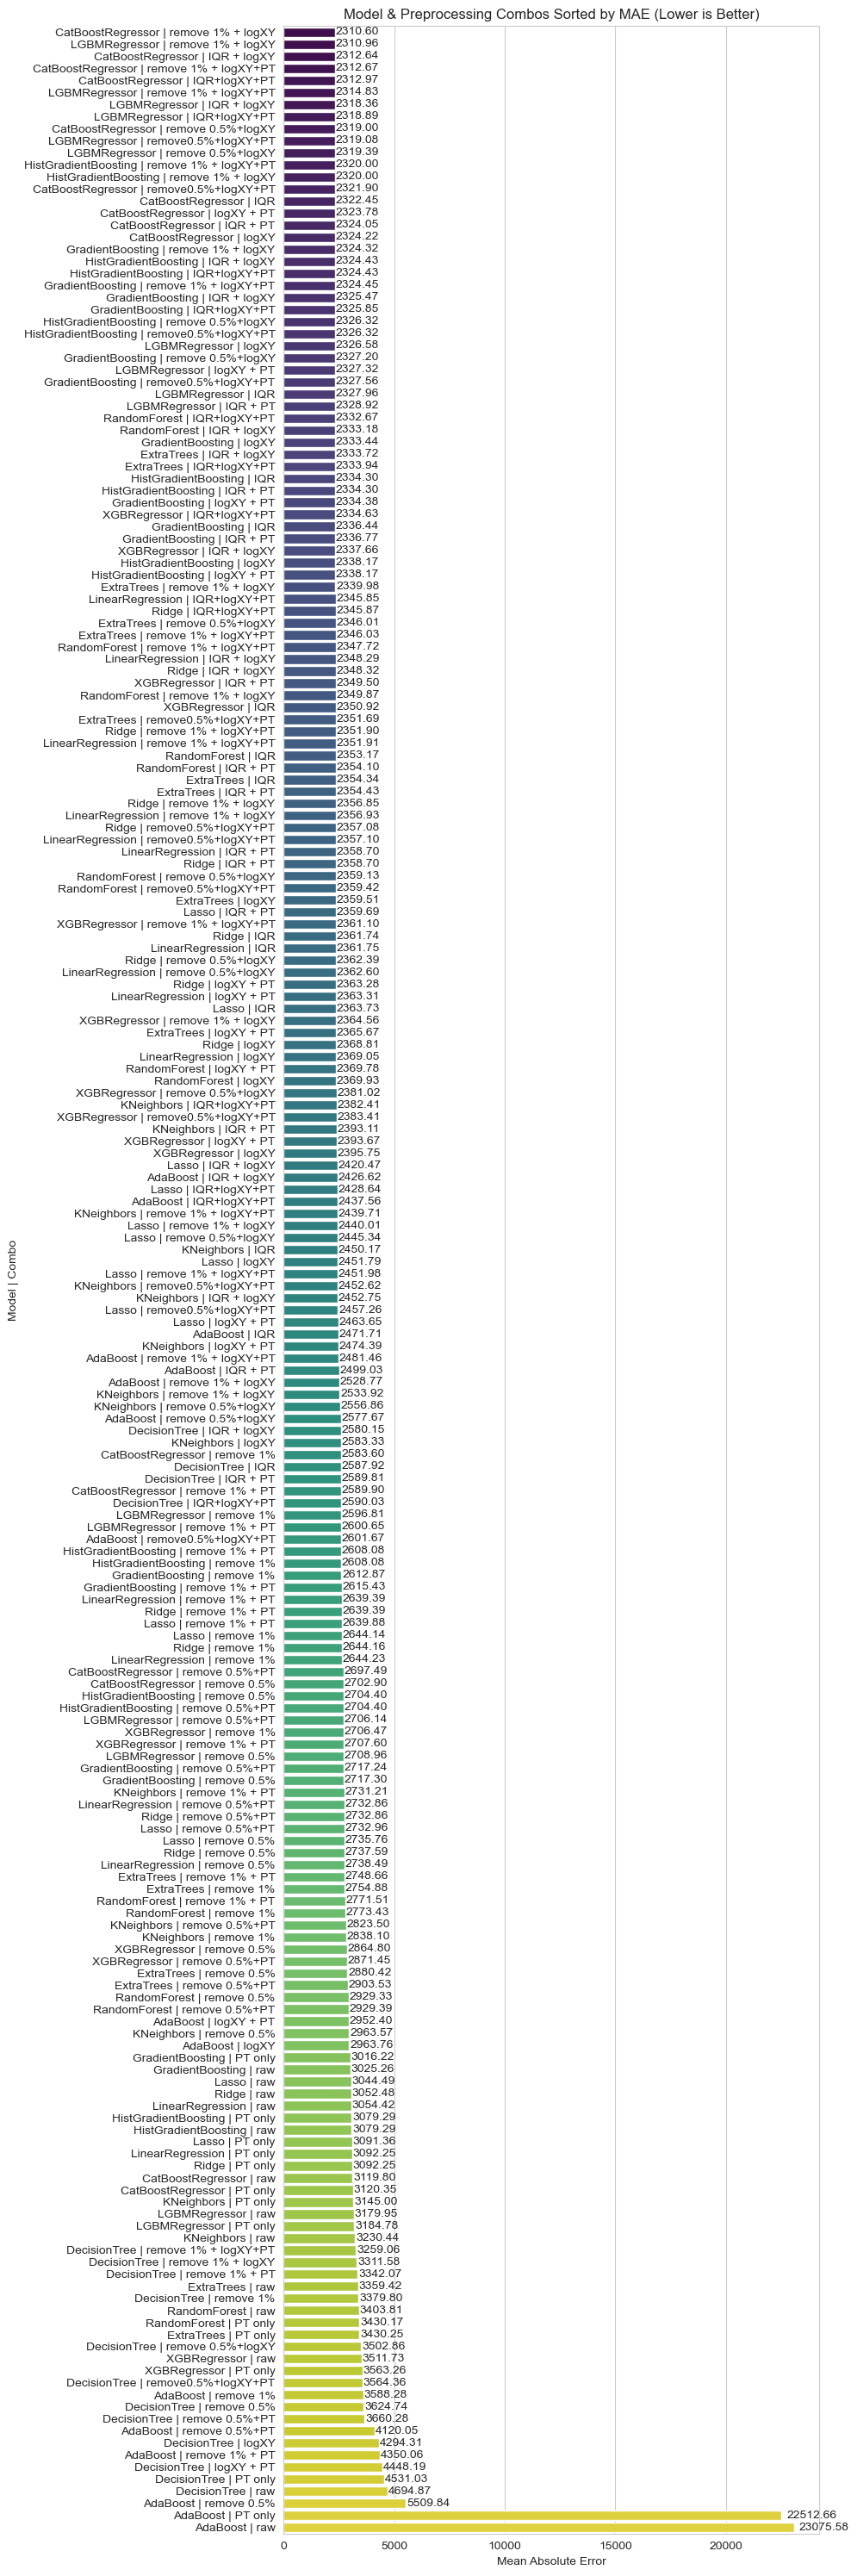

In [ ]:
# 6) 시각화
plt.figure(figsize=(10, 30))
ax = sns.barplot(
    x='MAE',
    y=df['model'] + ' | ' + df['combo'],
    data=df,
    palette='viridis'
)
plt.title('Model & Preprocessing Combos Sorted by MAE (Lower is Better)')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Model | Combo')

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.01 * width, y, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

상위 10개 결과를 보면 PT는 효과적이지 못함.

197	CatBoostRegressor	remove 1% + logXY	1.482069e+08	2310.604051  
181	LGBMRegressor	remove 1% + logXY	1.482740e+08	2310.955857  
205	CatBoostRegressor	IQR + logXY	1.507058e+08	2312.644684  
199	CatBoostRegressor	remove 1% + logXY+PT	1.482037e+08	2312.666845  
207	CatBoostRegressor	IQR+logXY+PT	1.507446e+08	2312.967935  
183	LGBMRegressor	remove 1% + logXY+PT	1.482051e+08	2314.831134  
189	LGBMRegressor	IQR + logXY	1.507363e+08	2318.363901  
191	LGBMRegressor	IQR+logXY+PT	1.507647e+08	2318.894286  
201	CatBoostRegressor	remove 0.5%+logXY	1.480473e+08	2318.997003  
187	LGBMRegressor	remove0.5%+logXY+PT	1.481278e+08	2319.078350  
185	LGBMRegressor	remove 0.5%+logXY	1.480498e+08	2319.392478  
151	HistGradientBoosting	remove 1% + logXY+PT	1.485917e+08	2320.001678  
149	HistGradientBoosting	remove 1% + logXY	1.485917e+08	2320.001678  
203	CatBoostRegressor	remove0.5%+logXY+PT	1.480934e+08	2321.903168  
204	CatBoostRegressor	IQR	1.497469e+08	2322.446722  
195	CatBoostRegressor	logXY + PT	1.477143e+08	2323.780359  
206	CatBoostRegressor	IQR + PT	1.497796e+08	2324.049536  
193	CatBoostRegressor	logXY	1.476645e+08	2324.221921  
133	GradientBoosting	remove 1% + logXY	1.487699e+08	2324.320708  
157	HistGradientBoosting	IQR + logXY	1.508897e+08	2324.432263  

---

### 전처리

In [173]:
# 전처리 함수: remove 1% + selective log1p on X
def preprocess(X, y, remove_pct=0.99):
    # 1) y 기준 이상치 제거
    thresh = np.percentile(y, remove_pct*100)
    mask = y <= thresh
    Xf = X.loc[mask].copy()
    yf = y.loc[mask].copy()
    # 2) y 로그 변환
    yf = np.log1p(yf)
    # 3) X selective log: skew>1 & non-negative
    skew_cols = Xf.columns[(Xf.skew().abs() > 1) & (Xf.min() >= 0)]
    Xf[skew_cols] = np.log1p(Xf[skew_cols])
    return Xf, yf, skew_cols

# train+valid 합치고 전처리
X_tv = pd.concat([X_train, X_valid], axis=0)
y_tv = pd.concat([y_train, y_valid], axis=0)
X_tv_proc, y_tv_proc, skew_cols = preprocess(X_tv, y_tv, remove_pct=0.99)

# test도 동일 전처리
X_test_proc = X_test.copy()
X_test_proc[skew_cols] = np.log1p(X_test_proc[skew_cols])

### 하이퍼파라미터 튜닝

In [174]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
import optuna

# PredefinedSplit 세팅 (전처리 후 인덱스로 train/valid 구분)
# 전처리로 남은 X_tv_proc.index가 원래 train인지 valid인지 판별
is_train = X_tv_proc.index.isin(X_train.index)  # True 면 train, False 면 valid
test_fold = np.where(is_train, -1, 0)
ps = PredefinedSplit(test_fold=test_fold)

# Optuna용 objective factory
def make_objective(model_name):
    def objective(trial):
        # 하이퍼파라미터
        if model_name == 'Cat':
            params = {
                'depth': trial.suggest_int('depth', 4, 10),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
                'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 9, step=2),
                'iterations': trial.suggest_categorical('iterations', [200,500,800]),
                'border_count': trial.suggest_categorical('border_count', [32,64,128]),
                'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
                'random_state': 42, 'verbose': False
            }
            model = CatBoostRegressor(**params)
        elif model_name == 'LGBM':
            params = {
                'n_estimators': trial.suggest_categorical('n_estimators', [100,200,300]),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
                'num_leaves': trial.suggest_categorical('num_leaves', [31,63,127]),
                'max_depth': trial.suggest_categorical('max_depth', [-1,5,10,15]),
                'min_child_samples': trial.suggest_categorical('min_child_samples', [5,10,20]),
                'subsample': trial.suggest_categorical('subsample', [0.6,0.8,1.0]),
                'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.6,0.8,1.0]),
                'random_state': 42
            }
            model = LGBMRegressor(**params)
        elif model_name == 'HistGB':
            params = {
                'max_iter': trial.suggest_categorical('max_iter', [100,200,300]),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
                'max_depth': trial.suggest_categorical('max_depth', [None,5,10]),
                'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1,3,5]),
                'l2_regularization': trial.suggest_categorical('l2_regularization', [0.0,0.1,0.5])
            }
            model = HistGradientBoostingRegressor(**params, random_state=42)
        else:  # GB
            params = {
                'n_estimators': trial.suggest_categorical('n_estimators', [100,200,300]),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
                'max_depth': trial.suggest_categorical('max_depth', [3,5,7]),
                'min_samples_split': trial.suggest_categorical('min_samples_split', [2,5,10]),
                'subsample': trial.suggest_categorical('subsample', [0.6,0.8,1.0]),
                'random_state': 42
            }
            model = GradientBoostingRegressor(**params)

        # PredefinedSplit CV
        preds = np.zeros(len(y_tv_proc))
        for train_idx, valid_idx in ps.split():
            X_tr, y_tr = X_tv_proc.iloc[train_idx], y_tv_proc.iloc[train_idx]
            X_va, y_va = X_tv_proc.iloc[valid_idx], y_tv_proc.iloc[valid_idx]

            if model_name == 'Cat':
                model.fit(X_tr, y_tr,
                        eval_set=(X_va, y_va),
                        use_best_model=True)
            elif model_name == 'LGBM':
                model.fit(X_tr, y_tr,
                        eval_set=[(X_va, y_va)])
            else:
                model.fit(X_tr, y_tr)

            preds[valid_idx] = model.predict(X_va)

        return mean_absolute_error(y_tv_proc, preds)
    return objective

# 모델별 Optuna 최적화 + 재학습
best_estimators = {}
studies = {} 

for name in tqdm(['Cat','LGBM','HistGB','GB'], desc="Optuna tuning"):
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(),
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
    )
    study.optimize(make_objective(name), n_trials=50, show_progress_bar=True)
    studies[name] = study 
    print(f"{name} best params:", study.best_params)
    # 재학습
    if name == 'Cat':
        mdl = CatBoostRegressor(**study.best_params, random_state=42)
        mdl.fit(X_tv_proc, y_tv_proc)
    elif name == 'LGBM':
        mdl = LGBMRegressor(**study.best_params, random_state=42)
        mdl.fit(
            X_tv_proc, y_tv_proc,
            eval_set=(X_valid, y_valid)
        )
    elif name == 'HistGB':
        mdl = HistGradientBoostingRegressor(**study.best_params, random_state=42)
        mdl.fit(X_tv_proc, y_tv_proc)
    else:
        mdl = GradientBoostingRegressor(**study.best_params, random_state=42)
        mdl.fit(X_tv_proc, y_tv_proc)

    best_estimators[name] = mdl

# Test MAE/MSE 비교
results = []
for name, mdl in best_estimators.items():
    y_pred = np.expm1(mdl.predict(X_test_proc))
    results.append({
        'model': name,
        'test_MAE': mean_absolute_error(y_test, y_pred),
        'test_MSE': mean_squared_error(y_test, y_pred)
    })
    
df_test = pd.DataFrame(results).set_index('model').sort_values('test_MAE')

Optuna tuning:   0%|          | 0/4 [00:00<?, ?it/s][I 2025-05-05 05:11:41,452] A new study created in memory with name: no-name-6cb0a0fb-f570-42eb-985a-14bc37982e80


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
Optuna tuning:   0%|          | 0/4 [00:01<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2025-05-05 05:11:43,074] Trial 0 finished with value: 5.726850139842712 and parameters: {'depth': 9, 'learning_rate': 0.047466193833534495, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.9752408816632262}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:02<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:43,635] Trial 1 finished with value: 5.731177141653411 and parameters: {'depth': 8, 'learning_rate': 0.014473987010568368, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.7026068072492939}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:02<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:43,898] Trial 2 finished with value: 5.730692308143437 and parameters: {'depth': 4, 'learning_rate': 0.032909033968976764, 'l2_leaf_reg': 3, 'iterations': 200, 'border_count': 64, 'bagging_temperature': 0.7026495904235271}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:04<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:45,492] Trial 3 finished with value: 5.727477520489025 and parameters: {'depth': 7, 'learning_rate': 0.070320470793453, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.9403706412696794}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:05<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:46,648] Trial 4 finished with value: 5.727814133890319 and parameters: {'depth': 6, 'learning_rate': 0.020985806632053138, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.6589176207457785}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:06<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:47,718] Trial 5 finished with value: 5.7301399611784625 and parameters: {'depth': 5, 'learning_rate': 0.00782976136964146, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.43580435890782643}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:06<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:48,024] Trial 6 finished with value: 5.72833145738069 and parameters: {'depth': 6, 'learning_rate': 0.0731070786382732, 'l2_leaf_reg': 9, 'iterations': 200, 'border_count': 32, 'bagging_temperature': 0.9287029911935496}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:07<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:48,802] Trial 7 finished with value: 5.72761244142204 and parameters: {'depth': 7, 'learning_rate': 0.0366445430862965, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 32, 'bagging_temperature': 0.554399733130138}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:08<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:49,912] Trial 8 finished with value: 5.7293563616862055 and parameters: {'depth': 8, 'learning_rate': 0.010743452758223849, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.6190227967641357}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:09<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:50,455] Trial 9 finished with value: 5.728076416113422 and parameters: {'depth': 8, 'learning_rate': 0.05432531844130269, 'l2_leaf_reg': 3, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.7695966757806156}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:11<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:52,730] Trial 10 finished with value: 5.730737767210182 and parameters: {'depth': 10, 'learning_rate': 0.005455374361926618, 'l2_leaf_reg': 1, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.06952511024912167}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:15<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:57,409] Trial 11 finished with value: 5.727815016600107 and parameters: {'depth': 10, 'learning_rate': 0.09963130154697432, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.9959606696810941}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:18<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:11:59,599] Trial 12 finished with value: 5.727102702422086 and parameters: {'depth': 9, 'learning_rate': 0.0493923737508091, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.36711528684271544}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:19<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:01,015] Trial 13 finished with value: 5.727247496432512 and parameters: {'depth': 9, 'learning_rate': 0.03815540081178397, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.3420651491716414}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:21<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:03,176] Trial 14 finished with value: 5.727190800105865 and parameters: {'depth': 9, 'learning_rate': 0.02610925449281143, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.2226559760929704}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:23<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:04,550] Trial 15 finished with value: 5.7272460693419065 and parameters: {'depth': 9, 'learning_rate': 0.04797287093513175, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.29673731050385055}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:25<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:07,385] Trial 16 finished with value: 5.7273512036146 and parameters: {'depth': 10, 'learning_rate': 0.024062182740063536, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.4726401907544375}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:27<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:08,822] Trial 17 finished with value: 5.727547606211648 and parameters: {'depth': 9, 'learning_rate': 0.05876887182797409, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.0909388138224051}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:28<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:09,909] Trial 18 finished with value: 5.727688674304296 and parameters: {'depth': 8, 'learning_rate': 0.09401491603822418, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.8464757379239386}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:32<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:13,634] Trial 19 finished with value: 5.727372055151927 and parameters: {'depth': 10, 'learning_rate': 0.019395375044523697, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.15809245012181017}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:33<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:14,802] Trial 20 finished with value: 5.727573257047801 and parameters: {'depth': 6, 'learning_rate': 0.04450907374906644, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.3793885749196132}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:35<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:17,193] Trial 21 finished with value: 5.727172647724828 and parameters: {'depth': 9, 'learning_rate': 0.02910079814432346, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.23008137067740453}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:38<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:19,674] Trial 22 finished with value: 5.727254683671124 and parameters: {'depth': 9, 'learning_rate': 0.029846258586373495, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.27272824308101146}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:39<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:21,445] Trial 23 finished with value: 5.727667574129966 and parameters: {'depth': 8, 'learning_rate': 0.01698169973553837, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.19025268149660196}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:42<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:23,654] Trial 24 finished with value: 5.727157200867523 and parameters: {'depth': 9, 'learning_rate': 0.041013146058593776, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.5536035731256376}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:44<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:25,792] Trial 25 finished with value: 5.727878634583295 and parameters: {'depth': 10, 'learning_rate': 0.06667196486841259, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.5429711387549947}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:45<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:27,113] Trial 26 finished with value: 5.727194171512084 and parameters: {'depth': 7, 'learning_rate': 0.041364700274773965, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.8101470784551119}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:47<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:28,734] Trial 27 finished with value: 5.727065457254011 and parameters: {'depth': 8, 'learning_rate': 0.051829146678851336, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.3703167325847503}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:47<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:29,132] Trial 28 finished with value: 5.7278531961062145 and parameters: {'depth': 8, 'learning_rate': 0.07739454194405167, 'l2_leaf_reg': 3, 'iterations': 200, 'border_count': 32, 'bagging_temperature': 0.42124316602263256}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:48<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:30,175] Trial 29 finished with value: 5.727423373275577 and parameters: {'depth': 8, 'learning_rate': 0.05212379221129768, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.3919555269038984}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:49<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:30,629] Trial 30 finished with value: 5.7323889548502915 and parameters: {'depth': 7, 'learning_rate': 0.011815588679619658, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.4944902389708351}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:51<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:32,820] Trial 31 finished with value: 5.727219180971611 and parameters: {'depth': 9, 'learning_rate': 0.05628063406315028, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.5766471862617164}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:53<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:35,001] Trial 32 finished with value: 5.726896951063227 and parameters: {'depth': 9, 'learning_rate': 0.03522146035441389, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.01238683693772713}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:55<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:36,636] Trial 33 finished with value: 5.727139483569185 and parameters: {'depth': 8, 'learning_rate': 0.03280541104884433, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.11720448713156839}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:55<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:37,437] Trial 34 finished with value: 5.727569669751515 and parameters: {'depth': 4, 'learning_rate': 0.06210127227679128, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.7324288486515417}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [00:58<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:39,660] Trial 35 finished with value: 5.727208141588004 and parameters: {'depth': 9, 'learning_rate': 0.03530741464670902, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.654875603045715}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:01<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:43,110] Trial 36 finished with value: 5.7274670287993 and parameters: {'depth': 10, 'learning_rate': 0.04915765387206754, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.31654599030600145}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:02<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:43,604] Trial 37 finished with value: 5.727555271060105 and parameters: {'depth': 8, 'learning_rate': 0.08413336553760832, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.05021987553949284}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:03<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:44,972] Trial 38 finished with value: 5.7275278821651 and parameters: {'depth': 7, 'learning_rate': 0.027885596752864204, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.8839908884461875}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:04<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:45,719] Trial 39 finished with value: 5.727543089205605 and parameters: {'depth': 7, 'learning_rate': 0.06901135670930424, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 32, 'bagging_temperature': 0.13599877202342073}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:06<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:47,948] Trial 40 finished with value: 5.7272138981095075 and parameters: {'depth': 9, 'learning_rate': 0.033644672781265796, 'l2_leaf_reg': 1, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.6936018760216809}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:08<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:49,649] Trial 41 finished with value: 5.72688760550382 and parameters: {'depth': 8, 'learning_rate': 0.032426683560253966, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.01807886220914036}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:09<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:51,297] Trial 42 finished with value: 5.727357606864998 and parameters: {'depth': 8, 'learning_rate': 0.020750719596853505, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.03344448676704964}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:11<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:52,936] Trial 43 finished with value: 5.727273673664739 and parameters: {'depth': 8, 'learning_rate': 0.045041801048081566, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.24379236691204453}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:14<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:55,773] Trial 44 finished with value: 5.726965003664436 and parameters: {'depth': 9, 'learning_rate': 0.03997238630385805, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.012539583512963531}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:14<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:56,178] Trial 45 finished with value: 5.730011733623534 and parameters: {'depth': 7, 'learning_rate': 0.024554314137459086, 'l2_leaf_reg': 5, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.020326846329784813}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:16<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:58,167] Trial 46 finished with value: 5.727150422951267 and parameters: {'depth': 8, 'learning_rate': 0.03872843381316335, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.00014890190523164475}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:17<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:12:58,941] Trial 47 finished with value: 5.727871051319575 and parameters: {'depth': 6, 'learning_rate': 0.031099519661833226, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 128, 'bagging_temperature': 0.066249378296862}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:22<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-05 05:13:03,650] Trial 48 finished with value: 5.727244845101428 and parameters: {'depth': 10, 'learning_rate': 0.01775173868284339, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.10126835107591892}. Best is trial 0 with value: 5.726850139842712.


Optuna tuning:   0%|          | 0/4 [01:24<?, ?it/s]

[I 2025-05-05 05:13:05,456] Trial 49 finished with value: 5.727380741517382 and parameters: {'depth': 9, 'learning_rate': 0.03621612494267801, 'l2_leaf_reg': 3, 'iterations': 500, 'border_count': 128, 'bagging_temperature': 0.1615555770421242}. Best is trial 0 with value: 5.726850139842712.
Cat best params: {'depth': 9, 'learning_rate': 0.047466193833534495, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.9752408816632262}
0:	learn: 0.8578162	total: 3.33ms	remaining: 1.66s
1:	learn: 0.8537047	total: 6.99ms	remaining: 1.74s
2:	learn: 0.8496367	total: 10.6ms	remaining: 1.75s
3:	learn: 0.8456635	total: 13.7ms	remaining: 1.7s
4:	learn: 0.8419360	total: 16.8ms	remaining: 1.67s
5:	learn: 0.8382890	total: 20.2ms	remaining: 1.66s
6:	learn: 0.8352620	total: 23.1ms	remaining: 1.63s
7:	learn: 0.8325262	total: 26.5ms	remaining: 1.63s
8:	learn: 0.8300030	total: 29.3ms	remaining: 1.6s
9:	learn: 0.8273248	total: 32.2ms	remaining: 1.58s
10:	learn: 0.8248558	total: 35m

Optuna tuning:  25%|██▌       | 1/4 [01:25<04:16, 85.52s/it][I 2025-05-05 05:13:06,970] A new study created in memory with name: no-name-e65d0d81-8fd2-4ae1-97dc-6f43065b1bd2


469:	learn: 0.6613288	total: 1.38s	remaining: 88ms
470:	learn: 0.6610499	total: 1.38s	remaining: 85.1ms
471:	learn: 0.6609618	total: 1.38s	remaining: 82.1ms
472:	learn: 0.6607666	total: 1.39s	remaining: 79.2ms
473:	learn: 0.6606184	total: 1.39s	remaining: 76.3ms
474:	learn: 0.6603232	total: 1.39s	remaining: 73.4ms
475:	learn: 0.6600710	total: 1.4s	remaining: 70.4ms
476:	learn: 0.6598564	total: 1.4s	remaining: 67.5ms
477:	learn: 0.6596609	total: 1.4s	remaining: 64.5ms
478:	learn: 0.6593945	total: 1.41s	remaining: 61.6ms
479:	learn: 0.6590256	total: 1.41s	remaining: 58.7ms
480:	learn: 0.6587604	total: 1.41s	remaining: 55.8ms
481:	learn: 0.6584474	total: 1.41s	remaining: 52.8ms
482:	learn: 0.6582367	total: 1.42s	remaining: 49.9ms
483:	learn: 0.6580510	total: 1.42s	remaining: 46.9ms
484:	learn: 0.6578212	total: 1.42s	remaining: 44ms
485:	learn: 0.6575169	total: 1.43s	remaining: 41ms
486:	learn: 0.6572654	total: 1.43s	remaining: 38.1ms
487:	learn: 0.6570385	total: 1.43s	remaining: 35.2ms
48

  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Optuna tuning:  25%|██▌       | 1/4 [01:26<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:26<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:08,159] Trial 1 finished with value: 5.730887724238452 and parameters: {'n_estimators': 100, 'learning_rate': 0.022901558691189795, 'num_leaves': 31, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 1.0}. Best is trial 1 with value: 5.730887724238452.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:29<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:11,377] Trial 2 finished with value: 5.729521371786481 and parameters: {'n_estimators': 300, 'learning_rate': 0.007392030437018638, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 2 with value: 5.729521371786481.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

Optuna tuning:  25%|██▌       | 1/4 [01:30<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:31<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:12,875] Trial 4 finished with value: 5.731956536408283 and parameters: {'n_estimators': 200, 'learning_rate': 0.009204848858176625, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 3 with value: 5.7284149981455945.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Optuna tuning:  25%|██▌       | 1/4 [01:31<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-05 05:13:13,303] Trial 5 finished with value: 5.72757217907588 and parameters: {'n_estimators': 200, 'learning_rate': 0.04813000881120389, 'num_leaves': 127, 'max_depth': 5, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 5 with value: 5.72757217907588.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGB

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:33<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:15,266] Trial 6 finished with value: 5.728756085899273 and parameters: {'n_estimators': 200, 'learning_rate': 0.014365617700211485, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 5 with value: 5.72757217907588.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:34<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:15,970] Trial 7 finished with value: 5.733019848828812 and parameters: {'n_estimators': 200, 'learning_rate': 0.007586634747698927, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 5, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 5 with value: 5.72757217907588.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:35<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:17,182] Trial 8 finished with value: 5.73531983499694 and parameters: {'n_estimators': 100, 'learning_rate': 0.008337345726449483, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 5 with value: 5.72757217907588.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:36<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:17,889] Trial 9 finished with value: 5.733839329988483 and parameters: {'n_estimators': 200, 'learning_rate': 0.0066865207407930385, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 5 with value: 5.72757217907588.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:36<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:18,418] Trial 10 finished with value: 5.728715069009147 and parameters: {'n_estimators': 100, 'learning_rate': 0.03799772040404415, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 5, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 5 with value: 5.72757217907588.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

Optuna tuning:  25%|██▌       | 1/4 [01:37<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Optuna tuning:  25%|██▌       | 1/4 [01:38<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Optuna tuning:  25%|██▌       | 1/4 [01:39<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Optuna tuning:  25%|██▌       | 1/4 [01:39<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Optuna tuning:  25%|██▌       | 1/4 [01:41<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-05 05:13:23,099] Trial 15 finished with value: 5.727343104379611 and parameters: {'n_estimators': 200, 'learning_rate': 0.029650151863433033, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Foun

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:42<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:24,110] Trial 16 finished with value: 5.727610865976721 and parameters: {'n_estimators': 200, 'learning_rate': 0.027656264751804667, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Optuna tuning:  25%|██▌       | 1/4 [01:44<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-05 05:13:25,778] Trial 17 finished with value: 5.727621644995403 and parameters: {'n_estimators': 200, 'learning_rate': 0.032700627549106846, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:46<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:27,634] Trial 18 finished with value: 5.728651502779271 and parameters: {'n_estimators': 200, 'learning_rate': 0.014054171802274895, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:47<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:28,634] Trial 19 finished with value: 5.72810745304907 and parameters: {'n_estimators': 200, 'learning_rate': 0.021468793298027092, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:49<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:30,488] Trial 20 finished with value: 5.733812380249694 and parameters: {'n_estimators': 200, 'learning_rate': 0.005231021161601949, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:50<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:31,548] Trial 21 finished with value: 5.727590865248057 and parameters: {'n_estimators': 200, 'learning_rate': 0.027699756840379588, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:51<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:32,682] Trial 22 finished with value: 5.727880190298924 and parameters: {'n_estimators': 200, 'learning_rate': 0.026009251435266036, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:52<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:33,687] Trial 23 finished with value: 5.7274172758674435 and parameters: {'n_estimators': 200, 'learning_rate': 0.037665527927730286, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:53<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-05 05:13:34,681] Trial 24 finished with value: 5.727588768203141 and parameters: {'n_estimators': 200, 'learning_rate': 0.037057218443006294, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:53<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:35,291] Trial 25 finished with value: 5.728863679644947 and parameters: {'n_estimators': 100, 'learning_rate': 0.0397830874380775, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

Optuna tuning:  25%|██▌       | 1/4 [01:54<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:56<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:37,720] Trial 27 finished with value: 5.728273675759904 and parameters: {'n_estimators': 200, 'learning_rate': 0.017977771630617905, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:56<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:38,317] Trial 28 finished with value: 5.7281109171312155 and parameters: {'n_estimators': 200, 'learning_rate': 0.03612447432951905, 'num_leaves': 31, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Optuna tuning:  25%|██▌       | 1/4 [01:57<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Optuna tuning:  25%|██▌       | 1/4 [01:57<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:58<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:40,156] Trial 31 finished with value: 5.727737445723216 and parameters: {'n_estimators': 200, 'learning_rate': 0.042607778879597026, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:59<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:41,133] Trial 32 finished with value: 5.728019897342365 and parameters: {'n_estimators': 200, 'learning_rate': 0.023197838159157467, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:00<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:42,321] Trial 33 finished with value: 5.727970200404912 and parameters: {'n_estimators': 200, 'learning_rate': 0.03340172286539395, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 1.0}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:01<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-05 05:13:43,319] Trial 34 finished with value: 5.727737349230838 and parameters: {'n_estimators': 200, 'learning_rate': 0.04341671012522536, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [02:02<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:43,938] Trial 35 finished with value: 5.728601954589531 and parameters: {'n_estimators': 200, 'learning_rate': 0.02532321874716894, 'num_leaves': 31, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:04<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:45,785] Trial 36 finished with value: 5.727892419744117 and parameters: {'n_estimators': 200, 'learning_rate': 0.019119730922412925, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:05<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:46,832] Trial 37 finished with value: 5.727847628957872 and parameters: {'n_estimators': 200, 'learning_rate': 0.03052353466988121, 'num_leaves': 63, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:06<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:47,952] Trial 38 finished with value: 5.728067951234724 and parameters: {'n_estimators': 100, 'learning_rate': 0.0495075102469599, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 1.0}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Optuna tuning:  25%|██▌       | 1/4 [02:06<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [02:09<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:50,592] Trial 40 finished with value: 5.729646011951156 and parameters: {'n_estimators': 200, 'learning_rate': 0.011045573913836879, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:10<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:51,772] Trial 41 finished with value: 5.727572449123462 and parameters: {'n_estimators': 200, 'learning_rate': 0.029428471770174547, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:11<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:52,803] Trial 42 finished with value: 5.727594435203062 and parameters: {'n_estimators': 200, 'learning_rate': 0.03703093269565405, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:12<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:53,905] Trial 43 finished with value: 5.727564760036283 and parameters: {'n_estimators': 200, 'learning_rate': 0.02932508365162277, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:14<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:55,652] Trial 44 finished with value: 5.727411343405001 and parameters: {'n_estimators': 300, 'learning_rate': 0.023187072915185736, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:15<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:57,177] Trial 45 finished with value: 5.727602083359844 and parameters: {'n_estimators': 300, 'learning_rate': 0.021971160717899174, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 5, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:17<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:13:58,922] Trial 46 finished with value: 5.727698719235591 and parameters: {'n_estimators': 300, 'learning_rate': 0.017331119019349694, 'num_leaves': 63, 'max_depth': -1, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Optuna tuning:  25%|██▌       | 1/4 [02:18<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [02:19<04:16, 85.52s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-05 05:14:00,555] Trial 48 finished with value: 5.728134824248484 and parameters: {'n_estimators': 300, 'learning_rate': 0.020689399000794376, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:20<04:16, 85.52s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-05 05:14:02,184] Trial 49 finished with value: 5.727570617777579 and parameters: {'n_estimators': 300, 'learning_rate': 0.04331288892363792, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 15 with value: 5.727343104379611.
LGBM best params: {'n_estimators': 200, 'learning_rate': 0.029650151863433033, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with 

Optuna tuning:  50%|█████     | 2/4 [02:22<02:17, 68.82s/it][I 2025-05-05 05:14:04,100] A new study created in memory with name: no-name-97ebc53b-015f-4dc7-9b2f-07c32e7ad503


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
Optuna tuning:  50%|█████     | 2/4 [02:23<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:04,959] Trial 0 finished with value: 5.736018013044991 and parameters: {'max_iter': 100, 'learning_rate': 0.010103280937558842, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.5}. Best is trial 0 with value: 5.736018013044991.


Optuna tuning:  50%|█████     | 2/4 [02:24<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:05,739] Trial 1 finished with value: 5.733199068355524 and parameters: {'max_iter': 100, 'learning_rate': 0.016526835401926957, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.1}. Best is trial 1 with value: 5.733199068355524.


Optuna tuning:  50%|█████     | 2/4 [02:25<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:06,788] Trial 2 finished with value: 5.729369161765117 and parameters: {'max_iter': 100, 'learning_rate': 0.03457036892734173, 'max_depth': None, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 2 with value: 5.729369161765117.


Optuna tuning:  50%|█████     | 2/4 [02:26<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:07,507] Trial 3 finished with value: 5.729146223935832 and parameters: {'max_iter': 100, 'learning_rate': 0.048693339112571225, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 3 with value: 5.729146223935832.


Optuna tuning:  50%|█████     | 2/4 [02:28<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:09,526] Trial 4 finished with value: 5.730084628802701 and parameters: {'max_iter': 200, 'learning_rate': 0.013981409588770696, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.5}. Best is trial 3 with value: 5.729146223935832.


Optuna tuning:  50%|█████     | 2/4 [02:30<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:11,525] Trial 5 finished with value: 5.73046253438191 and parameters: {'max_iter': 200, 'learning_rate': 0.012790490766598873, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.1}. Best is trial 3 with value: 5.729146223935832.


Optuna tuning:  50%|█████     | 2/4 [02:31<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:13,101] Trial 6 finished with value: 5.728401710469825 and parameters: {'max_iter': 300, 'learning_rate': 0.04256133156503603, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 6 with value: 5.728401710469825.


Optuna tuning:  50%|█████     | 2/4 [02:33<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:15,103] Trial 7 finished with value: 5.728929150004707 and parameters: {'max_iter': 200, 'learning_rate': 0.02102501793129166, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 6 with value: 5.728401710469825.


Optuna tuning:  50%|█████     | 2/4 [02:34<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:15,821] Trial 8 finished with value: 5.731271458126667 and parameters: {'max_iter': 100, 'learning_rate': 0.0254378429741744, 'max_depth': 5, 'min_samples_leaf': 1, 'l2_regularization': 0.0}. Best is trial 6 with value: 5.728401710469825.


Optuna tuning:  50%|█████     | 2/4 [02:36<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:18,364] Trial 9 finished with value: 5.728570265249513 and parameters: {'max_iter': 300, 'learning_rate': 0.0261683870874818, 'max_depth': None, 'min_samples_leaf': 5, 'l2_regularization': 0.5}. Best is trial 6 with value: 5.728401710469825.


Optuna tuning:  50%|█████     | 2/4 [02:39<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:21,115] Trial 10 finished with value: 5.728308761887083 and parameters: {'max_iter': 300, 'learning_rate': 0.04022888859895575, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 10 with value: 5.728308761887083.


Optuna tuning:  50%|█████     | 2/4 [02:42<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:23,499] Trial 11 finished with value: 5.7282135895362405 and parameters: {'max_iter': 300, 'learning_rate': 0.04790690252339198, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [02:45<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:26,558] Trial 12 finished with value: 5.728357898052097 and parameters: {'max_iter': 300, 'learning_rate': 0.034962690081639505, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [02:47<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:29,277] Trial 13 finished with value: 5.728311405484836 and parameters: {'max_iter': 300, 'learning_rate': 0.035756373060574866, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [02:49<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:31,206] Trial 14 finished with value: 5.728539777385055 and parameters: {'max_iter': 300, 'learning_rate': 0.04978812819259633, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [02:52<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:34,203] Trial 15 finished with value: 5.728635040660101 and parameters: {'max_iter': 300, 'learning_rate': 0.03066982430532603, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [02:55<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:36,853] Trial 16 finished with value: 5.728334461892259 and parameters: {'max_iter': 300, 'learning_rate': 0.041911191108427545, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [02:59<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:41,092] Trial 17 finished with value: 5.7285594304678655 and parameters: {'max_iter': 300, 'learning_rate': 0.02023800616723843, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:01<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:43,078] Trial 18 finished with value: 5.7286512390254085 and parameters: {'max_iter': 300, 'learning_rate': 0.04096014345859001, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:04<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:45,986] Trial 19 finished with value: 5.728793577957911 and parameters: {'max_iter': 300, 'learning_rate': 0.02954967886677382, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:06<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:48,450] Trial 20 finished with value: 5.728390272492225 and parameters: {'max_iter': 200, 'learning_rate': 0.049934569535164494, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:09<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:51,373] Trial 21 finished with value: 5.72840792233651 and parameters: {'max_iter': 300, 'learning_rate': 0.03636098060531682, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:12<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:54,384] Trial 22 finished with value: 5.728350533975761 and parameters: {'max_iter': 300, 'learning_rate': 0.03973327073842952, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:15<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:57,435] Trial 23 finished with value: 5.7287657465069985 and parameters: {'max_iter': 300, 'learning_rate': 0.030480041454233806, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:18<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:14:59,833] Trial 24 finished with value: 5.728421613527318 and parameters: {'max_iter': 300, 'learning_rate': 0.04392339910747066, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:21<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:02,640] Trial 25 finished with value: 5.728481456842962 and parameters: {'max_iter': 300, 'learning_rate': 0.037059289166127815, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:24<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:05,745] Trial 26 finished with value: 5.728720062387405 and parameters: {'max_iter': 300, 'learning_rate': 0.02496120952979389, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:26<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:08,123] Trial 27 finished with value: 5.728527853641043 and parameters: {'max_iter': 300, 'learning_rate': 0.04481020942280807, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:28<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:10,385] Trial 28 finished with value: 5.728534857030564 and parameters: {'max_iter': 200, 'learning_rate': 0.03237509852318264, 'max_depth': 5, 'min_samples_leaf': 1, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:32<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:14,216] Trial 29 finished with value: 5.728684291525591 and parameters: {'max_iter': 300, 'learning_rate': 0.027998787721077587, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:33<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:15,357] Trial 30 finished with value: 5.732510942721079 and parameters: {'max_iter': 100, 'learning_rate': 0.018666723282275227, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:36<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:17,952] Trial 31 finished with value: 5.728548144386095 and parameters: {'max_iter': 300, 'learning_rate': 0.03867629413492836, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:38<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:20,084] Trial 32 finished with value: 5.728681538420421 and parameters: {'max_iter': 300, 'learning_rate': 0.04302282692615423, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:41<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:22,574] Trial 33 finished with value: 5.728719937406651 and parameters: {'max_iter': 300, 'learning_rate': 0.0340673211723721, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:42<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:24,249] Trial 34 finished with value: 5.728908745383941 and parameters: {'max_iter': 100, 'learning_rate': 0.04549568833621114, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:44<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:26,100] Trial 35 finished with value: 5.728732729821674 and parameters: {'max_iter': 300, 'learning_rate': 0.038875773829708894, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:47<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:29,210] Trial 36 finished with value: 5.728437514206208 and parameters: {'max_iter': 300, 'learning_rate': 0.046139830679895064, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:49<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:30,512] Trial 37 finished with value: 5.734605824471394 and parameters: {'max_iter': 100, 'learning_rate': 0.011595263055650869, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:50<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:32,245] Trial 38 finished with value: 5.728668703183534 and parameters: {'max_iter': 200, 'learning_rate': 0.03379991001482179, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:53<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:34,806] Trial 39 finished with value: 5.728727117035236 and parameters: {'max_iter': 300, 'learning_rate': 0.017329630390176987, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:54<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:35,835] Trial 40 finished with value: 5.728675848154784 and parameters: {'max_iter': 300, 'learning_rate': 0.041387219989230235, 'max_depth': 5, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:55<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:37,360] Trial 41 finished with value: 5.72843124400302 and parameters: {'max_iter': 300, 'learning_rate': 0.03981343989945022, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:57<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:38,709] Trial 42 finished with value: 5.72860194739052 and parameters: {'max_iter': 300, 'learning_rate': 0.04651439657435641, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [03:58<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:40,323] Trial 43 finished with value: 5.728548592738939 and parameters: {'max_iter': 300, 'learning_rate': 0.036875647850622584, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [04:00<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:41,618] Trial 44 finished with value: 5.728377638938166 and parameters: {'max_iter': 300, 'learning_rate': 0.04136187328220884, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [04:01<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:42,628] Trial 45 finished with value: 5.733234572971237 and parameters: {'max_iter': 100, 'learning_rate': 0.014743365624617906, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [04:02<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:44,292] Trial 46 finished with value: 5.728558575358339 and parameters: {'max_iter': 200, 'learning_rate': 0.03284975259996661, 'max_depth': None, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [04:04<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:46,117] Trial 47 finished with value: 5.72876662815968 and parameters: {'max_iter': 300, 'learning_rate': 0.023190914745433368, 'max_depth': 10, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [04:05<02:17, 68.82s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:15:47,301] Trial 48 finished with value: 5.728310789329046 and parameters: {'max_iter': 300, 'learning_rate': 0.04769732929116709, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.7282135895362405.


Optuna tuning:  50%|█████     | 2/4 [04:07<02:17, 68.82s/it]

[I 2025-05-05 05:15:48,581] Trial 49 finished with value: 5.728517281084505 and parameters: {'max_iter': 300, 'learning_rate': 0.04781088935793563, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.7282135895362405.
HistGB best params: {'max_iter': 300, 'learning_rate': 0.04790690252339198, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.0}


Optuna tuning:  75%|███████▌  | 3/4 [04:08<01:25, 85.73s/it][I 2025-05-05 05:15:49,958] A new study created in memory with name: no-name-f2062cfa-40d3-4ac6-a074-3e08b7862174


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
Optuna tuning:  75%|███████▌  | 3/4 [05:07<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:16:48,526] Trial 0 finished with value: 5.72921024769197 and parameters: {'n_estimators': 200, 'learning_rate': 0.024547901177182117, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 0 with value: 5.72921024769197.


Optuna tuning:  75%|███████▌  | 3/4 [06:05<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:17:46,924] Trial 1 finished with value: 5.729063662961451 and parameters: {'n_estimators': 200, 'learning_rate': 0.024382744341565152, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 1.0}. Best is trial 1 with value: 5.729063662961451.


Optuna tuning:  75%|███████▌  | 3/4 [06:18<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:17:59,828] Trial 2 finished with value: 5.729645640357768 and parameters: {'n_estimators': 100, 'learning_rate': 0.03854864903483181, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.6}. Best is trial 1 with value: 5.729063662961451.


Optuna tuning:  75%|███████▌  | 3/4 [06:47<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:18:28,855] Trial 3 finished with value: 5.729291687230319 and parameters: {'n_estimators': 100, 'learning_rate': 0.04089895788815115, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 1.0}. Best is trial 1 with value: 5.729063662961451.


Optuna tuning:  75%|███████▌  | 3/4 [07:29<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:19:11,131] Trial 4 finished with value: 5.729107539239889 and parameters: {'n_estimators': 200, 'learning_rate': 0.0243717357874664, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 1 with value: 5.729063662961451.


Optuna tuning:  75%|███████▌  | 3/4 [07:50<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:19:32,232] Trial 5 finished with value: 5.729137996439287 and parameters: {'n_estimators': 100, 'learning_rate': 0.04761781470230112, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 1.0}. Best is trial 1 with value: 5.729063662961451.


Optuna tuning:  75%|███████▌  | 3/4 [08:49<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:20:30,564] Trial 6 finished with value: 5.728483625168423 and parameters: {'n_estimators': 200, 'learning_rate': 0.04516059841937587, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 1.0}. Best is trial 6 with value: 5.728483625168423.


Optuna tuning:  75%|███████▌  | 3/4 [09:27<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:21:09,187] Trial 7 finished with value: 5.730199646021183 and parameters: {'n_estimators': 300, 'learning_rate': 0.021422885802883256, 'max_depth': 3, 'min_samples_split': 10, 'subsample': 1.0}. Best is trial 6 with value: 5.728483625168423.


Optuna tuning:  75%|███████▌  | 3/4 [10:18<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:22:00,381] Trial 8 finished with value: 5.72789514143165 and parameters: {'n_estimators': 300, 'learning_rate': 0.024833941425941506, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 8 with value: 5.72789514143165.


Optuna tuning:  75%|███████▌  | 3/4 [11:04<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:22:45,912] Trial 9 finished with value: 5.727881988031362 and parameters: {'n_estimators': 200, 'learning_rate': 0.028557020062149913, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 9 with value: 5.727881988031362.


Optuna tuning:  75%|███████▌  | 3/4 [11:24<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:23:06,122] Trial 10 finished with value: 5.734153352359123 and parameters: {'n_estimators': 200, 'learning_rate': 0.010866546858573557, 'max_depth': 3, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 9 with value: 5.727881988031362.


Optuna tuning:  75%|███████▌  | 3/4 [12:33<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:24:15,271] Trial 11 finished with value: 5.727911110572488 and parameters: {'n_estimators': 300, 'learning_rate': 0.017149284290306672, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 9 with value: 5.727881988031362.


Optuna tuning:  75%|███████▌  | 3/4 [13:27<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:25:08,452] Trial 12 finished with value: 5.727866151143913 and parameters: {'n_estimators': 300, 'learning_rate': 0.0322462487456983, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 12 with value: 5.727866151143913.


Optuna tuning:  75%|███████▌  | 3/4 [14:19<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:26:00,815] Trial 13 finished with value: 5.727898033825099 and parameters: {'n_estimators': 300, 'learning_rate': 0.03170119107728067, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 12 with value: 5.727866151143913.


Optuna tuning:  75%|███████▌  | 3/4 [15:30<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:27:11,766] Trial 14 finished with value: 5.727808787025235 and parameters: {'n_estimators': 300, 'learning_rate': 0.032402373697476144, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 14 with value: 5.727808787025235.


Optuna tuning:  75%|███████▌  | 3/4 [16:02<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:27:43,607] Trial 15 finished with value: 5.729091581540797 and parameters: {'n_estimators': 300, 'learning_rate': 0.034052880515754086, 'max_depth': 3, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 14 with value: 5.727808787025235.


Optuna tuning:  75%|███████▌  | 3/4 [16:54<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:28:36,108] Trial 16 finished with value: 5.728043497552508 and parameters: {'n_estimators': 300, 'learning_rate': 0.017021328016400206, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.6}. Best is trial 14 with value: 5.727808787025235.


Optuna tuning:  75%|███████▌  | 3/4 [18:05<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:29:46,690] Trial 17 finished with value: 5.727792550510789 and parameters: {'n_estimators': 300, 'learning_rate': 0.018178761942412122, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [18:56<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:30:37,901] Trial 18 finished with value: 5.729558723859801 and parameters: {'n_estimators': 300, 'learning_rate': 0.01207014863846385, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [19:27<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:31:09,251] Trial 19 finished with value: 5.730321282923315 and parameters: {'n_estimators': 300, 'learning_rate': 0.018293702340489985, 'max_depth': 3, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [20:38<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:32:19,970] Trial 20 finished with value: 5.7281867553658365 and parameters: {'n_estimators': 300, 'learning_rate': 0.013676053871129211, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [21:31<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:33:12,782] Trial 21 finished with value: 5.727944711824939 and parameters: {'n_estimators': 300, 'learning_rate': 0.029322876560860966, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.6}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [22:42<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:34:23,743] Trial 22 finished with value: 5.728074102476263 and parameters: {'n_estimators': 300, 'learning_rate': 0.01980988101385312, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [23:33<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:35:15,011] Trial 23 finished with value: 5.7283445579672465 and parameters: {'n_estimators': 300, 'learning_rate': 0.014570417156979128, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.6}. Best is trial 17 with value: 5.727792550510789.


Optuna tuning:  75%|███████▌  | 3/4 [24:42<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:36:24,165] Trial 24 finished with value: 5.727789292699491 and parameters: {'n_estimators': 300, 'learning_rate': 0.034838161314347874, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 24 with value: 5.727789292699491.


Optuna tuning:  75%|███████▌  | 3/4 [25:05<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:36:46,756] Trial 25 finished with value: 5.728694088998879 and parameters: {'n_estimators': 100, 'learning_rate': 0.03756861850373439, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 24 with value: 5.727789292699491.


Optuna tuning:  75%|███████▌  | 3/4 [26:13<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:37:54,913] Trial 26 finished with value: 5.727526678926533 and parameters: {'n_estimators': 300, 'learning_rate': 0.026496357094084554, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [27:22<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:39:03,641] Trial 27 finished with value: 5.727546457645474 and parameters: {'n_estimators': 300, 'learning_rate': 0.027108855943116558, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [27:54<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:39:35,674] Trial 28 finished with value: 5.729419966670626 and parameters: {'n_estimators': 300, 'learning_rate': 0.028019150598182562, 'max_depth': 3, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [28:11<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:39:52,695] Trial 29 finished with value: 5.730611391829613 and parameters: {'n_estimators': 100, 'learning_rate': 0.02722689389764793, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [29:21<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:41:02,601] Trial 30 finished with value: 5.727828263412872 and parameters: {'n_estimators': 300, 'learning_rate': 0.021602405784943816, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [30:31<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:42:13,343] Trial 31 finished with value: 5.727835568614801 and parameters: {'n_estimators': 300, 'learning_rate': 0.03551435089905631, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [31:42<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:43:23,701] Trial 32 finished with value: 5.727612931350415 and parameters: {'n_estimators': 300, 'learning_rate': 0.025269722275184783, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [32:52<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:44:33,595] Trial 33 finished with value: 5.7275631850065665 and parameters: {'n_estimators': 300, 'learning_rate': 0.025592161844328914, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [34:03<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:45:44,575] Trial 34 finished with value: 5.727703886263575 and parameters: {'n_estimators': 300, 'learning_rate': 0.023055959277049756, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [34:25<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:46:07,385] Trial 35 finished with value: 5.729573264068528 and parameters: {'n_estimators': 100, 'learning_rate': 0.026079242975258796, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [34:59<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:46:40,683] Trial 36 finished with value: 5.729003958850848 and parameters: {'n_estimators': 200, 'learning_rate': 0.023073599787466797, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [36:25<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:48:06,778] Trial 37 finished with value: 5.728888127625108 and parameters: {'n_estimators': 300, 'learning_rate': 0.029968360419173553, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 1.0}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [36:47<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:48:29,307] Trial 38 finished with value: 5.728664852500652 and parameters: {'n_estimators': 100, 'learning_rate': 0.04181095020027178, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [37:49<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:49:31,070] Trial 39 finished with value: 5.728481642039743 and parameters: {'n_estimators': 300, 'learning_rate': 0.025737463894112342, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 1.0}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [38:34<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:50:15,948] Trial 40 finished with value: 5.728535393391175 and parameters: {'n_estimators': 200, 'learning_rate': 0.020300850881945103, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [39:42<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:51:23,785] Trial 41 finished with value: 5.727656602662021 and parameters: {'n_estimators': 300, 'learning_rate': 0.0233696246317254, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [40:50<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:52:31,557] Trial 42 finished with value: 5.72760278439347 and parameters: {'n_estimators': 300, 'learning_rate': 0.024182420792689886, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [41:57<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:53:39,353] Trial 43 finished with value: 5.7275905110192475 and parameters: {'n_estimators': 300, 'learning_rate': 0.024904460500900335, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [43:05<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:54:47,029] Trial 44 finished with value: 5.727740218838297 and parameters: {'n_estimators': 300, 'learning_rate': 0.027082890531707725, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [44:13<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:55:54,529] Trial 45 finished with value: 5.727737222349348 and parameters: {'n_estimators': 300, 'learning_rate': 0.020617581824760797, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [44:37<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:56:19,420] Trial 46 finished with value: 5.730429313945972 and parameters: {'n_estimators': 200, 'learning_rate': 0.029490208003177983, 'max_depth': 3, 'min_samples_split': 5, 'subsample': 1.0}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [45:45<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:57:26,928] Trial 47 finished with value: 5.727730929050362 and parameters: {'n_estimators': 300, 'learning_rate': 0.022245422567170586, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [46:53<01:25, 85.73s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3252621933.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-05 05:58:34,548] Trial 48 finished with value: 5.727563737914649 and parameters: {'n_estimators': 300, 'learning_rate': 0.024414556447741983, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.


Optuna tuning:  75%|███████▌  | 3/4 [48:00<01:25, 85.73s/it]

[I 2025-05-05 05:59:42,167] Trial 49 finished with value: 5.727716217960862 and parameters: {'n_estimators': 300, 'learning_rate': 0.030806504344120918, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 26 with value: 5.727526678926533.
GB best params: {'n_estimators': 300, 'learning_rate': 0.026496357094084554, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}


Optuna tuning: 100%|██████████| 4/4 [49:31<00:00, 742.91s/it] 


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


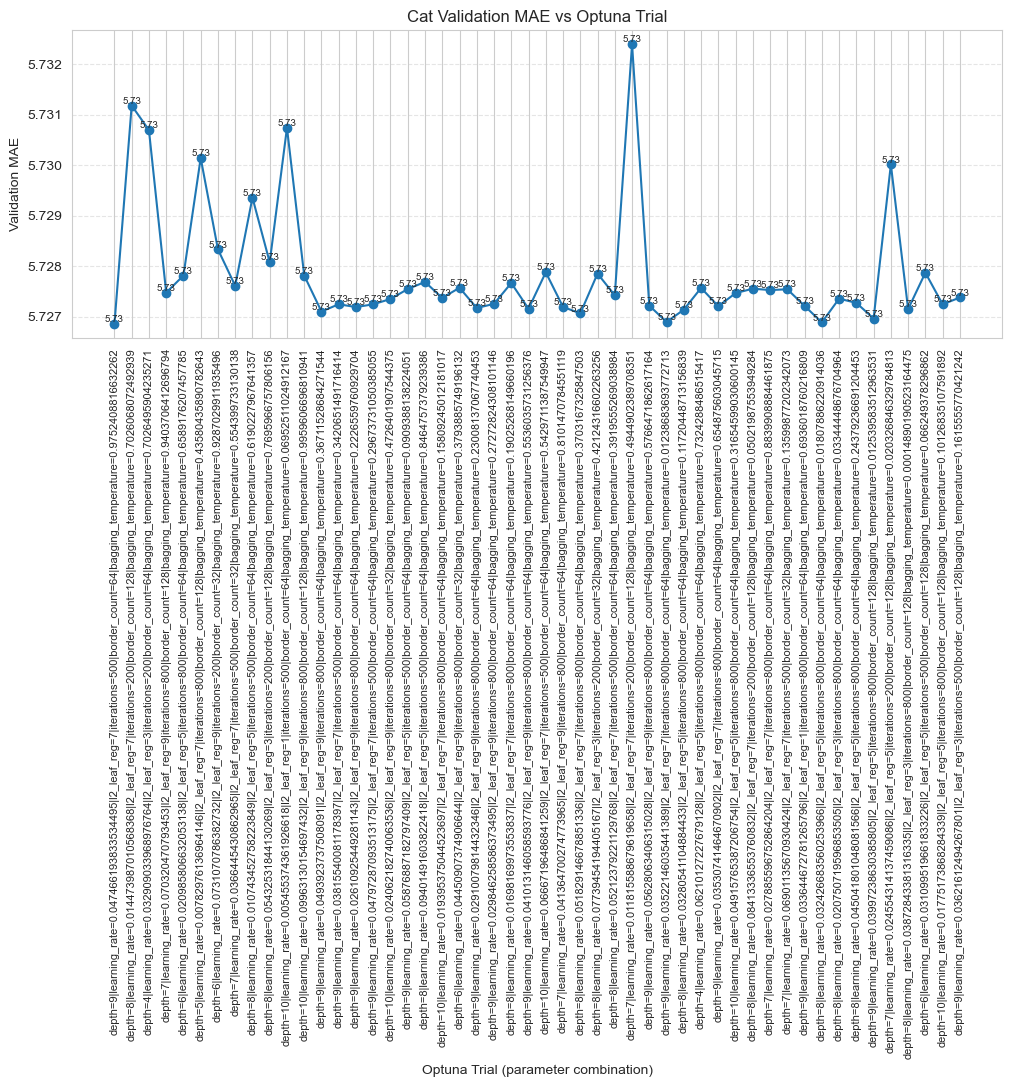

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


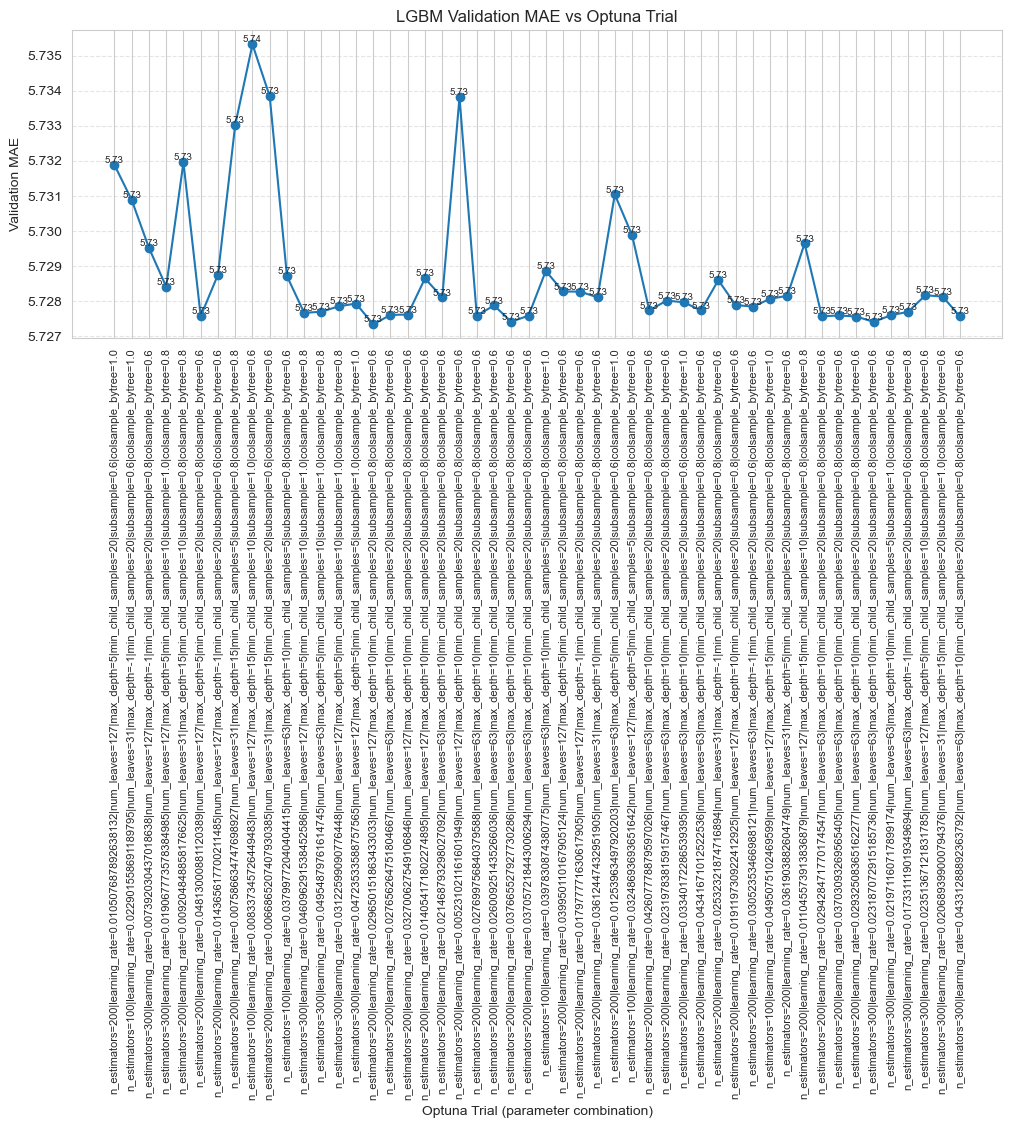

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


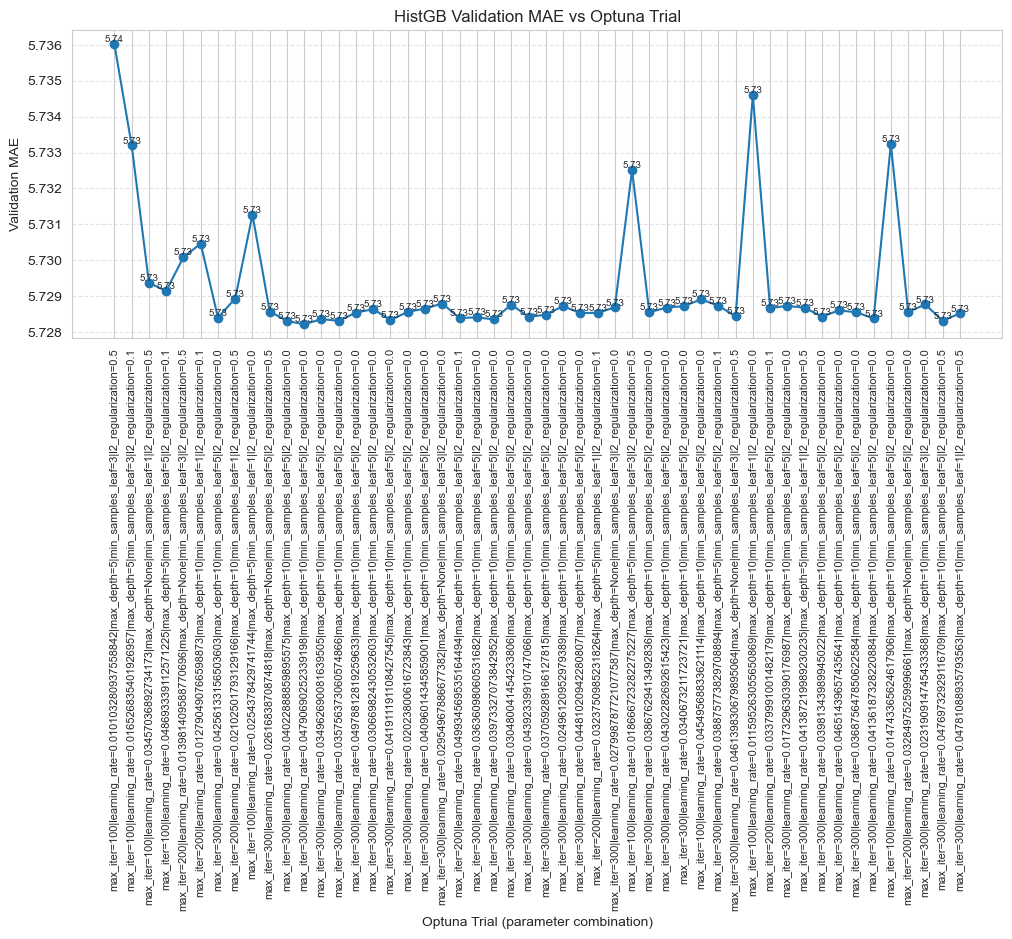

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


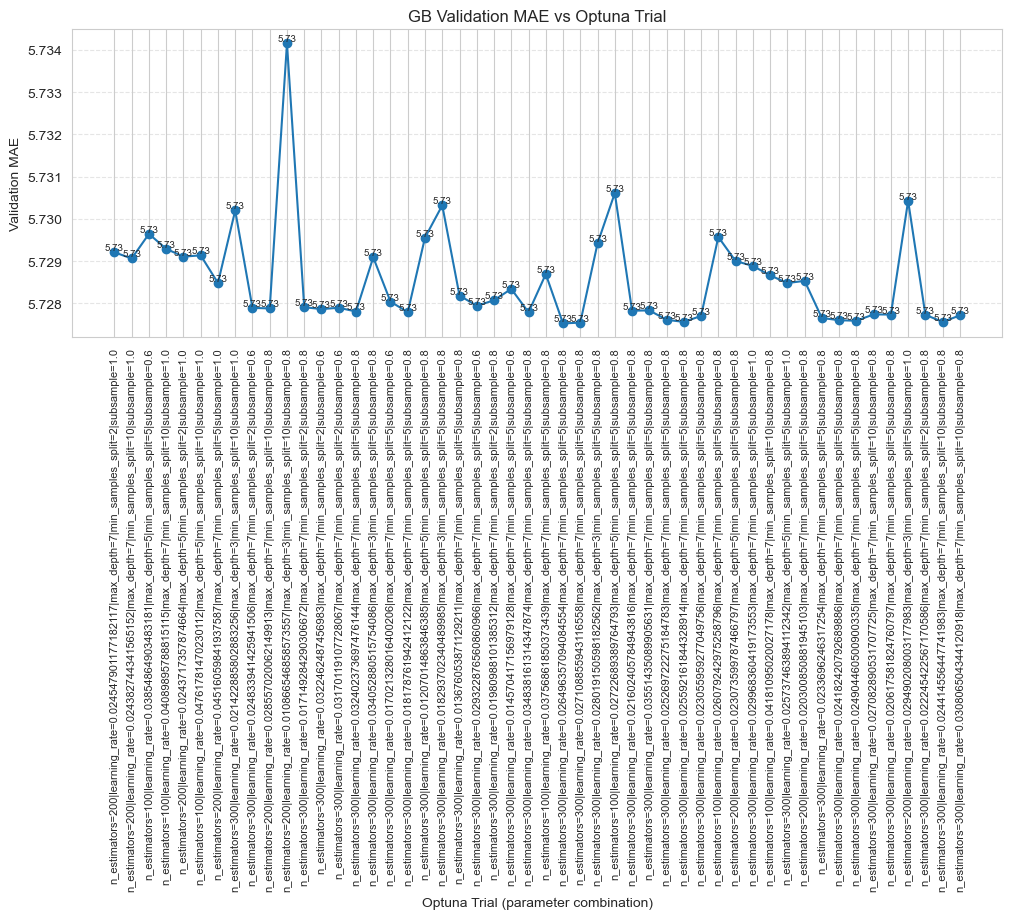

In [176]:
# 하이퍼파라미터 튜닝 시각화

for name, study in studies.items():
    # 1) trials 정보 추출
    records = []
    for t in study.trials:
        # trial.params 는 dict, trial.value 는 validation MAE
        combo = "|".join(f"{k}={v}" for k, v in t.params.items())
        records.append({
            "trial": t.number,
            "validation_MAE": t.value,
            "combo": combo
        })
    df_trials = pd.DataFrame(records)

    # 2) 시각화
    plt.figure(figsize=(12, 4))
    plt.plot(df_trials["trial"], df_trials["validation_MAE"], marker="o", linestyle="-")
    plt.xticks(df_trials["trial"], df_trials["combo"], rotation=90, fontsize=8)
    plt.title(f"{name} Validation MAE vs Optuna Trial")
    plt.xlabel("Optuna Trial (parameter combination)")
    plt.ylabel("Validation MAE")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    for _, row in df_trials.iterrows():
        plt.text(row["trial"], row["validation_MAE"], f"{row['validation_MAE']:.2f}",
                 ha="center", va="bottom", fontsize=7)
    plt.tight_layout()
    plt.show()

In [177]:
best_estimators

{'Cat': <catboost.core.CatBoostRegressor at 0x34e0b5d30>,
 'LGBM': LGBMRegressor(colsample_bytree=0.6, learning_rate=0.029650151863433033,
               max_depth=10, n_estimators=200, num_leaves=127, random_state=42,
               subsample=0.8),
 'HistGB': HistGradientBoostingRegressor(learning_rate=0.04790690252339198, max_depth=10,
                               max_iter=300, min_samples_leaf=5,
                               random_state=42),
 'GB': GradientBoostingRegressor(learning_rate=0.026496357094084554, max_depth=7,
                           min_samples_split=5, n_estimators=300,
                           random_state=42, subsample=0.8)}

In [178]:
cat_params = best_estimators['Cat'].get_params()
print(cat_params)

{'iterations': 500, 'learning_rate': 0.047466193833534495, 'depth': 9, 'l2_leaf_reg': 7, 'loss_function': 'RMSE', 'border_count': 64, 'bagging_temperature': 0.9752408816632262, 'random_state': 42}


In [179]:
df_test

test_MAE      test_MSE
model                            
Cat     2306.120015  1.483671e+08
LGBM    2311.749034  1.482953e+08
GB      2315.328897  1.482858e+08
HistGB  2318.463999  1.485512e+08

In [180]:
# 1) 테스트 MAE 최저 모델 이름
best_model_name = df_test['test_MAE'].idxmin()
best_model = best_estimators[best_model_name]

# 2) Validation MAE (Optuna) 와 Test MAE/MSE (df_test) 가져오기
validation_mae = studies[best_model_name].best_value
test_mae       = df_test.loc[best_model_name, 'test_MAE']
test_mse       = df_test.loc[best_model_name, 'test_MSE']

# 3) 튜닝된 파라미터
tuned_params = studies[best_model_name].best_params

print(f"최종 선택 모델       : {best_model_name}")
print(f"튜닝된 하이퍼파라미터 : {tuned_params}")
print(f"Validation MAE       : {validation_mae:.2f}")
print(f"Test MAE             : {test_mae:.2f}")
print(f"Test MSE             : {test_mse:.4e}")

최종 선택 모델       : Cat
튜닝된 하이퍼파라미터 : {'depth': 9, 'learning_rate': 0.047466193833534495, 'l2_leaf_reg': 7, 'iterations': 500, 'border_count': 64, 'bagging_temperature': 0.9752408816632262}
Validation MAE       : 5.73
Test MAE             : 2306.12
Test MSE             : 1.4837e+08


In [181]:
from itertools import combinations
from sklearn.ensemble import (
    StackingRegressor, VotingRegressor
)

# 앙상블: Stacking & Voting
ensemble_results = []
base_items = list(best_estimators.items())
meta_models = {'Ridge': Ridge(), 'Lasso': Lasso()}

# Stacking 조합
for r in [2, 3]:
    for combo in tqdm(list(combinations(base_items, r)), desc=f"Stacking r={r}", leave=False):
        names, models_ = zip(*combo)
        for meta_name, meta in meta_models.items():
            stack = StackingRegressor(
                estimators=list(zip(names, models_)),
                final_estimator=meta,
                n_jobs=-1
            )
            stack.fit(X_tv_proc, y_tv_proc)
            y_pred = np.expm1(stack.predict(X_test_proc))
            ensemble_results.append({
                'type': f"Stack({'+'.join(names)})/{meta_name}",
                'MAE': mean_absolute_error(y_test, y_pred)
            })

# Voting 조합
for r in [2, 3]:
    for combo in tqdm(list(combinations(base_items, r)), desc=f"Voting r={r}", leave=False):
        names, models_ = zip(*combo)
        vote = VotingRegressor(estimators=list(zip(names, models_)), n_jobs=-1)
        vote.fit(X_tv_proc, y_tv_proc)
        y_pred = np.expm1(vote.predict(X_test_proc))
        ensemble_results.append({
            'type': f"Vote({'+'.join(names)})",
            'MAE': mean_absolute_error(y_test, y_pred)
        })

# 결과 정리 및 출력
df_ens = pd.DataFrame(ensemble_results).sort_values('MAE').reset_index(drop=True)
pd.set_option('display.max_rows', None)
print("\n=== Ensemble Results ===")
print(df_ens.to_string(index=False))

Stacking r=2:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
0:	learn: 0.8578162	total: 59.2ms	remaining: 29.5s
1:	learn: 0.8537047	total: 62.4ms	remaining: 15.5s
2:	learn: 0.8496367	total: 65.6ms	remaining: 10.9s
3:	learn: 0.8456635	total: 68.7ms	remaining: 8.52s
4:	learn: 0.8419360	total: 71.7ms	remaining: 7.09s
5:	learn: 0.8382890	total: 74.7ms	remaining: 6.15s
6:	learn: 0.8352620	total: 77.8ms	remaining: 5.48s
7:	learn: 0.8325262	total: 81.2ms	remaining: 4.99s
8:	learn: 0.8300030	total: 85ms	remaining: 4.64s
9:	learn: 0.8273248	total: 88.1ms	remaining: 4.32s
10:	learn: 0.8248558	total: 91.1ms	remaining: 4.05s
11:	learn: 0.82238

Stacking r=2:  17%|█▋        | 1/6 [01:09<05:49, 69.84s/it]

0:	learn: 0.8578162	total: 61.5ms	remaining: 30.7s
1:	learn: 0.8537047	total: 64.6ms	remaining: 16.1s
2:	learn: 0.8496367	total: 67.6ms	remaining: 11.2s
3:	learn: 0.8456635	total: 70.7ms	remaining: 8.77s
4:	learn: 0.8419360	total: 74ms	remaining: 7.32s
5:	learn: 0.8382890	total: 77ms	remaining: 6.34s
6:	learn: 0.8352620	total: 80.1ms	remaining: 5.64s
7:	learn: 0.8325262	total: 83.1ms	remaining: 5.11s
8:	learn: 0.8300030	total: 85.9ms	remaining: 4.68s
9:	learn: 0.8273248	total: 88.9ms	remaining: 4.36s
10:	learn: 0.8248558	total: 92.8ms	remaining: 4.12s
11:	learn: 0.8223882	total: 95.8ms	remaining: 3.9s
12:	learn: 0.8200914	total: 98.8ms	remaining: 3.7s
13:	learn: 0.8180166	total: 102ms	remaining: 3.54s
14:	learn: 0.8160911	total: 105ms	remaining: 3.4s
15:	learn: 0.8141257	total: 108ms	remaining: 3.28s
16:	learn: 0.8122177	total: 111ms	remaining: 3.17s
17:	learn: 0.8104296	total: 115ms	remaining: 3.07s
18:	learn: 0.8089222	total: 117ms	remaining: 2.97s
19:	learn: 0.8075387	total: 120ms	r

Stacking r=2:  33%|███▎      | 2/6 [01:25<02:31, 37.98s/it]

0:	learn: 0.8578162	total: 91.2ms	remaining: 45.5s
1:	learn: 0.8537047	total: 95.8ms	remaining: 23.9s
2:	learn: 0.8496367	total: 99.9ms	remaining: 16.6s
3:	learn: 0.8456635	total: 104ms	remaining: 12.9s
4:	learn: 0.8419360	total: 108ms	remaining: 10.7s
5:	learn: 0.8382890	total: 111ms	remaining: 9.16s
6:	learn: 0.8352620	total: 115ms	remaining: 8.08s
7:	learn: 0.8325262	total: 118ms	remaining: 7.28s
8:	learn: 0.8300030	total: 122ms	remaining: 6.65s
9:	learn: 0.8273248	total: 125ms	remaining: 6.14s
10:	learn: 0.8248558	total: 130ms	remaining: 5.79s
11:	learn: 0.8223882	total: 136ms	remaining: 5.51s
12:	learn: 0.8200914	total: 141ms	remaining: 5.27s
13:	learn: 0.8180166	total: 145ms	remaining: 5.02s
14:	learn: 0.8160911	total: 148ms	remaining: 4.79s
15:	learn: 0.8141257	total: 152ms	remaining: 4.6s
16:	learn: 0.8122177	total: 157ms	remaining: 4.47s
17:	learn: 0.8104296	total: 161ms	remaining: 4.32s
18:	learn: 0.8089222	total: 166ms	remaining: 4.2s
19:	learn: 0.8075387	total: 171ms	remain

Stacking r=2:  50%|█████     | 3/6 [07:27<09:17, 185.77s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_name

Stacking r=2:  67%|██████▋   | 4/6 [08:27<04:32, 136.16s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_name

Stacking r=3:   0%|          | 0/4 [00:00<?, ?it/s]         

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
0:	learn: 0.8578162	total: 58.7ms	remaining: 29.3s
1:	learn: 0.8537047	total: 62.7ms	remaining: 15.6s
2:	learn: 0.8496367	total: 66.2ms	remaining: 11s
3:	learn: 0.8456635	total: 69.4ms	remaining: 8.61s
4:	learn: 0.8419360	total: 72.8ms	remaining: 7.21s
5:	learn: 0.8382890	total: 76ms	remaining: 6.26s
6:	learn: 0.8352620	total: 79.3ms	remaining: 5.59s
7:	learn: 0.8325262	total: 83.2ms	remaining: 5.12s
8:	learn: 0.8300030	total: 86.3ms	remaining: 4.71s
9:	learn: 0.8273248	total: 89.5ms	remaining: 4.39s
10:	learn: 0.8248558	total: 92.5ms	remaining: 4.11s
11:	learn: 0.8223882

Stacking r=3:  25%|██▌       | 1/4 [01:08<03:24, 68.22s/it]

0:	learn: 0.8578162	total: 61ms	remaining: 30.4s
1:	learn: 0.8537047	total: 65.5ms	remaining: 16.3s
2:	learn: 0.8496367	total: 68.8ms	remaining: 11.4s
3:	learn: 0.8456635	total: 72.4ms	remaining: 8.97s
4:	learn: 0.8419360	total: 75.7ms	remaining: 7.5s
5:	learn: 0.8382890	total: 78.9ms	remaining: 6.5s
6:	learn: 0.8352620	total: 82.2ms	remaining: 5.79s
7:	learn: 0.8325262	total: 85.8ms	remaining: 5.28s
8:	learn: 0.8300030	total: 89.7ms	remaining: 4.89s
9:	learn: 0.8273248	total: 93.2ms	remaining: 4.56s
10:	learn: 0.8248558	total: 96.4ms	remaining: 4.28s
11:	learn: 0.8223882	total: 100ms	remaining: 4.07s
12:	learn: 0.8200914	total: 104ms	remaining: 3.88s
13:	learn: 0.8180166	total: 107ms	remaining: 3.72s
14:	learn: 0.8160911	total: 110ms	remaining: 3.57s
15:	learn: 0.8141257	total: 114ms	remaining: 3.46s
16:	learn: 0.8122177	total: 118ms	remaining: 3.35s
17:	learn: 0.8104296	total: 121ms	remaining: 3.24s
18:	learn: 0.8089222	total: 124ms	remaining: 3.15s
19:	learn: 0.8075387	total: 128ms	

Stacking r=3:  50%|█████     | 2/4 [07:15<08:08, 244.41s/it]

0:	learn: 0.8578162	total: 60.2ms	remaining: 30.1s
1:	learn: 0.8537047	total: 64.4ms	remaining: 16s
2:	learn: 0.8496367	total: 68.5ms	remaining: 11.3s
3:	learn: 0.8456635	total: 72.8ms	remaining: 9.02s
4:	learn: 0.8419360	total: 76.4ms	remaining: 7.56s
5:	learn: 0.8382890	total: 80ms	remaining: 6.58s
6:	learn: 0.8352620	total: 84.2ms	remaining: 5.93s
7:	learn: 0.8325262	total: 88.2ms	remaining: 5.42s
8:	learn: 0.8300030	total: 91.8ms	remaining: 5.01s
9:	learn: 0.8273248	total: 95.4ms	remaining: 4.67s
10:	learn: 0.8248558	total: 99.6ms	remaining: 4.42s
11:	learn: 0.8223882	total: 103ms	remaining: 4.2s
12:	learn: 0.8200914	total: 107ms	remaining: 4.01s
13:	learn: 0.8180166	total: 111ms	remaining: 3.87s
14:	learn: 0.8160911	total: 115ms	remaining: 3.71s
15:	learn: 0.8141257	total: 118ms	remaining: 3.58s
16:	learn: 0.8122177	total: 122ms	remaining: 3.47s
17:	learn: 0.8104296	total: 126ms	remaining: 3.37s
18:	learn: 0.8089222	total: 130ms	remaining: 3.28s
19:	learn: 0.8075387	total: 133ms	r

Stacking r=3:  75%|███████▌  | 3/4 [13:18<04:58, 298.47s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Voting r=2:   0%|          | 0/6 [00:00<?, ?it/s]           

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
0:	learn: 0.8578162	total: 61.4ms	remaining: 30.6s
1:	learn: 0.8537047	total: 64.7ms	remaining: 16.1s
2:	learn: 0.8496367	total: 67.7ms	remaining: 11.2s
3:	learn: 0.8456635	total: 70.8ms	remaining: 8.77s
4:	learn: 0.8419360	total: 73.7ms	remaining: 7.29s
5:	learn: 0.8382890	total: 76.7ms	remaining: 6.32s
6:	learn: 0.8352620	total: 80ms	remaining: 5.63s
7:	learn: 0.8325262	total: 83.1ms	remaining: 5.11s
8:	learn: 0.8300030	total: 86.5ms	remaining: 4.72s
9:	learn: 0.8273248	total: 89.6ms	remaining: 4.39s
10:	learn: 0.8248558	total: 92.9ms	remaining: 4.13s
11:	learn: 0.82238

Voting r=2:  17%|█▋        | 1/6 [00:03<00:17,  3.44s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.8578162	total: 60.5ms	remaining: 30.2s
1:	learn: 0.8537047	total: 64ms	remaining: 15.9s
2:	learn: 0.8496367	total: 67.2ms	remaining: 11.1s
3:	learn: 0.8456635	total: 70.2ms	remaining: 8.71s
4:	learn: 0.8419360	total: 73.1ms	remaining: 7.23s
5:	learn: 0.8382890	total: 76.2ms	remaining: 6.27s
6:	learn: 0.8352620	total: 79.3ms	remaining: 5.58s
7:	learn: 0.8325262	total: 82.6ms	remaining: 5.08s
8:	learn: 0.8300030	total: 85.7ms	remaining: 4.68s
9:	learn: 0.827324

Voting r=2:  33%|███▎      | 2/6 [00:06<00:11,  3.00s/it]

0:	learn: 0.8578162	total: 61.5ms	remaining: 30.7s
1:	learn: 0.8537047	total: 65.1ms	remaining: 16.2s
2:	learn: 0.8496367	total: 68.8ms	remaining: 11.4s
3:	learn: 0.8456635	total: 72.6ms	remaining: 9.01s
4:	learn: 0.8419360	total: 76.5ms	remaining: 7.58s
5:	learn: 0.8382890	total: 80.4ms	remaining: 6.62s
6:	learn: 0.8352620	total: 83.7ms	remaining: 5.9s
7:	learn: 0.8325262	total: 87.6ms	remaining: 5.39s
8:	learn: 0.8300030	total: 91.1ms	remaining: 4.97s
9:	learn: 0.8273248	total: 95.6ms	remaining: 4.68s
10:	learn: 0.8248558	total: 99ms	remaining: 4.4s
11:	learn: 0.8223882	total: 103ms	remaining: 4.17s
12:	learn: 0.8200914	total: 108ms	remaining: 4.03s
13:	learn: 0.8180166	total: 111ms	remaining: 3.87s
14:	learn: 0.8160911	total: 115ms	remaining: 3.71s
15:	learn: 0.8141257	total: 118ms	remaining: 3.58s
16:	learn: 0.8122177	total: 122ms	remaining: 3.46s
17:	learn: 0.8104296	total: 126ms	remaining: 3.36s
18:	learn: 0.8089222	total: 130ms	remaining: 3.28s
19:	learn: 0.8075387	total: 135ms	

Voting r=2:  50%|█████     | 3/6 [01:43<02:17, 45.94s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Voting r=2:  67%|██████▋   | 4/6 [01:45<00:57, 28.88s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Voting r=3:   0%|          | 0/4 [00:00<?, ?it/s]        

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
0:	learn: 0.8578162	total: 61ms	remaining: 30.4s
1:	learn: 0.8537047	total: 69.7ms	remaining: 17.4s
2:	learn: 0.8496367	total: 77.3ms	remaining: 12.8s
3:	learn: 0.8456635	total: 81.5ms	remaining: 10.1s
4:	learn: 0.8419360	total: 85ms	remaining: 8.42s
5:	learn: 0.8382890	total: 89.5ms	remaining: 7.37s
6:	learn: 0.8352620	total: 94.1ms	remaining: 6.63s
7:	learn: 0.8325262	total: 97.4ms	remaining: 5.99s
8:	learn: 0.8300030	total: 101ms	remaining: 5.51s
9:	learn: 0.8273248	total: 105ms	remaining: 5.14s
10:	learn:

Voting r=3:  25%|██▌       | 1/4 [00:04<00:12,  4.14s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
0:	learn: 0.8578162	total: 61.1ms	remaining: 30.5s
1:	learn: 0.8537047	total: 85.1ms	remaining: 21.2s
2:	learn: 0.8496367	total: 89ms	remaining: 14.7s
3:	learn: 0.8456635	total: 92.2ms	remaining: 11.4s
4:	learn: 0.8419360	total: 95.5ms	remaining: 9.46s
5:	learn: 0.8382890	total: 99ms	remaining: 8.15s
6:	learn: 0.8352620	total: 103ms	remaining: 7.23s
7:	learn: 0.8325262	total: 106ms	remaining: 6.53s
8:	learn: 0.8300030	total: 109ms	remaining: 5.97s
9:	learn: 0.8273248	total: 113ms	remaining: 5.52s
10:	learn: 0.8248558	total: 116ms	remaining: 5.16s
11:	learn: 0.8223882	tota

Voting r=3:  50%|█████     | 2/4 [01:41<01:58, 59.20s/it]

0:	learn: 0.8578162	total: 60.3ms	remaining: 30.1s
1:	learn: 0.8537047	total: 63.9ms	remaining: 15.9s
2:	learn: 0.8496367	total: 67.4ms	remaining: 11.2s
3:	learn: 0.8456635	total: 70.5ms	remaining: 8.74s
4:	learn: 0.8419360	total: 73.5ms	remaining: 7.28s
5:	learn: 0.8382890	total: 77.6ms	remaining: 6.39s
6:	learn: 0.8352620	total: 80.9ms	remaining: 5.7s
7:	learn: 0.8325262	total: 84.3ms	remaining: 5.19s
8:	learn: 0.8300030	total: 87.8ms	remaining: 4.79s
9:	learn: 0.8273248	total: 91.2ms	remaining: 4.47s
10:	learn: 0.8248558	total: 94.8ms	remaining: 4.21s
11:	learn: 0.8223882	total: 98.1ms	remaining: 3.99s
12:	learn: 0.8200914	total: 101ms	remaining: 3.79s
13:	learn: 0.8180166	total: 104ms	remaining: 3.63s
14:	learn: 0.8160911	total: 108ms	remaining: 3.48s
15:	learn: 0.8141257	total: 111ms	remaining: 3.37s
16:	learn: 0.8122177	total: 115ms	remaining: 3.26s
17:	learn: 0.8104296	total: 118ms	remaining: 3.16s
18:	learn: 0.8089222	total: 121ms	remaining: 3.07s
19:	learn: 0.8075387	total: 12

Voting r=3:  75%|███████▌  | 3/4 [03:18<01:16, 76.42s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



=== Ensemble Results ===
                        type         MAE
Stack(Cat+LGBM+HistGB)/Ridge 2305.699673
       Stack(Cat+LGBM)/Ridge 2305.704299
              Vote(Cat+LGBM) 2305.710293
    Stack(Cat+LGBM+GB)/Ridge 2305.830210
     Stack(Cat+HistGB)/Ridge 2306.331969
         Stack(Cat+GB)/Ridge 2306.336264
  Stack(Cat+HistGB+GB)/Ridge 2306.345295
           Vote(Cat+LGBM+GB) 2307.088320
                Vote(Cat+GB) 2307.475856
       Vote(Cat+LGBM+HistGB) 2307.789639
            Vote(Cat+HistGB) 2308.921105
         Vote(Cat+HistGB+GB) 2308.923481
 Stack(LGBM+HistGB+GB)/Ridge 2310.169340
        Stack(LGBM+GB)/Ridge 2310.364126
    Stack(LGBM+HistGB)/Ridge 2310.578981
               Vote(LGBM+GB) 2311.183340
        Vote(LGBM+HistGB+GB) 2311.534295
           Vote(LGBM+HistGB) 2312.077264
      Stack(HistGB+GB)/Ridge 2312.820984
             Vote(HistGB+GB) 2313.850830
  Stack(Cat+HistGB+GB)/Lasso 2450.819718
    Stack(Cat+LGBM+GB)/Lasso 2450.819718
 Stack(LGBM+HistGB+GB)/Lasso 24

In [182]:
best_ens = df_ens.iloc[0]
print(f"최종 앙상블: {best_ens['type']}  (Test MAE: {best_ens['MAE']:.2f})")

최종 앙상블: Stack(Cat+LGBM+HistGB)/Ridge  (Test MAE: 2305.70)
